# 1. Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import date
pd.set_option("display.max_columns", 100)

In [2]:
from ReviewMiner import *

In [194]:
def quick_aspect_opinion_view(df, id_column, content_column):
    aoe = AspectOpinionExtractor(df, id_column, content_column)
    aoe.aspect_opinon_for_all_comments()
    aoe.popular_aspects_view()
    
def data_first_look(df):
    print(f"Data has in total {df.shape[0]} rows and {df.shape[1]} features.")
    missing_rates = pd.DataFrame(df.isna().mean())\
                    .rename({0:'perc_missing'}, axis=1)\
                    .sort_values('perc_missing', ascending=False)
    print("{}% of the features don't have missing values"\
          .format(round(sum(missing_rates['perc_missing']==0)*100/len(missing_rates), 2)))
    missing_rates[missing_rates['perc_missing']>0].plot.bar(title="Missing rates")

In [185]:
calendar = pd.read_csv("calendar.csv")
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews.csv")

# 2. Data exploration

## 2.1 Listings data

Let's first take a look at the listings data to see what are the offerings in Boston. Listing data has all the information of each listing including the description of the room, host, housing policy, price, review scores etc. Let's deep dive into the data to see if there are interesting features we can use for modeling later.

In [29]:
listings.head(3)

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   

  last_scraped                               name  \
0   2016-09-07         Sunny Bungalow in the City   
1   2016-09-07  Charming room in pet friendly apt   
2   2016-09-07   Mexican Folk Art Haven in Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   

                               neighborhood_overview  \
0  Roslindale is quiet, convenient and friendly. ...   
1  The room is in Roslindale, a diverse and prima...   
2  The LOCATION: Roslindale is a safe and diverse...   

                                               notes  \
0                                                NaN   
1  If you don't have a US cell phone, you can tex...   
2  I am in a scenic part of Boston with a couple ...   

                                             transit  \
0  The bus stop is 2 blocks away, and frequent. B...   
1  Plenty of safe street parking. Bus stops a few...   
2  PUBLIC TRANSPORTATION: From the house, quick p...   

                                              access  \
0  You will have access to 2 bedrooms, a living r...   
1  Apt has one more bedroom (which I use) and lar...   
2  I am living in the apartment during your stay,...   

                                         interaction  \
0                                                NaN   
1  If I am at home, I am likely working in my hom...   
2  ABOUT ME: I'm a laid-back, friendly, unmarried...   

                                         house_rules  \
0  Clean up and treat the home the way you'd like...   
1  Pet friendly but please confirm with me if the...   
2  I encourage you to use my kitchen, cooking and...   

                                       thumbnail_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   
1  https://a1.muscache.com/im/pictures/39327812/d...   
2  https://a2.muscache.com/im/pictures/6ae8335d-9...   

                                          medium_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   
1  https://a1.muscache.com/im/pictures/39327812/d...   
2  https://a2.muscache.com/im/pictures/6ae8335d-9...   

                                         picture_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   
1  https://a1.muscache.com/im/pictures/39327812/d...   
2  https://a2.muscache.com/im/pictures/6ae8335d-9...   

                                      xl_picture_url   host_id  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...  31303940   
1  https://a1.muscache.com/im/pictures/39327812/d...   2572247   
2  https://a2.muscache.com/im/pictures/6ae8335d-9...     16701   

                                     host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/31303940  Virginia  2015-04-15   
1   https://www.airbnb.com/users/show/2572247    Andrea  2012-06-07   
2     https://www.airbnb.com/users/show/16701      Phil  2009-05-11   

                          host_location  \
0  Boston, Massachusetts, United States   
1  Boston, Massachusetts, United States   
2  Boston, Massachusetts, United States   

            

Data has in total 3585 rows and 95 features.
53.68% of the features don't have missing values


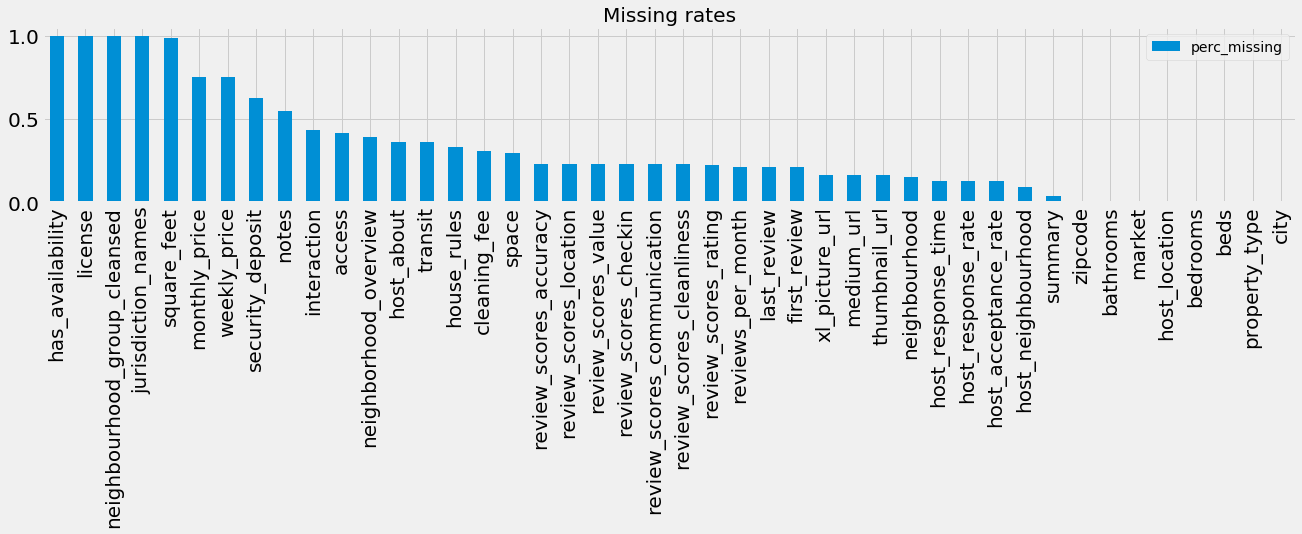

In [195]:
plt.rcParams['figure.figsize'] = (20,3)
data_first_look(listings)

Most of the useful columns have low missing rates.

### 2.1.1 Description Data
There are quite a few feautures are decription (natural language data). An example of these columns:

In [62]:
listings[['description','space','neighborhood_overview','house_rules']].head()

description  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                               neighborhood_overview  \
0  Roslindale is quiet, convenient and friendly. ...   
1  The room is in Roslindale, a diverse and prima...   
2  The LOCATION: Roslindale is a safe and diverse...   
3  Roslindale is a lovely little neighborhood loc...   
4  I love the proximity to downtown, the neighbor...   

                                         house_rules  
0  Clean up and treat the home the way you'd like...  
1  Pet friendly but please confirm with me if the...  
2  I encourage you to use my kitchen, cooking and...  
3  - The bathroom and house are shared so please ...  
4  Please no smoking in the house, porch or on th...

To explore these columns, we'd love to see what aspects and corresponding opinions are in those columns. For example, for the sentence:

In [68]:
listings.loc[0,'space']

'The house has an open and cozy feel at the same time.  The living room has a flat screen TV.  The kitchen has all you need for cooking.  We prefer you buy your food but can use the organic oils, herbs, etc.   The yard can be seen from sitting room and when the weather allows, the yard is a place children can lose themselves in a safe way.  We have 2 bee hives, 6 hens fenced in (sometimes they get out of their coop area & into the yard), 2 rabbits in a hutch and play structure.'

It talks about `open and cozy feel`, `flat screen TV`, `kitchen`, `yard`, `sitting room` etc. However, it's hard to extract all the aspects in the sentence. I'll use a tool I built for work to do the aspects/opinion extraction. The tool extract popular opinions for the most popular 9 aspects in the sentence. Let's take a look! (We only displayed the columns with meaningful insights!)

> ### Name and summary

In the name and summary fields of the of listings, hosts love to mention `private room`, `downtown & south Boston`, `cozy and spacious apartments`, `sunny` and `locations`.

Aspect Opinion Extractor: 2019-08-03 12:49:46.928299
0.017 min later: finished 13.95%
0.033 min later: finished 27.89%
0.05 min later: finished 41.84%
0.067 min later: finished 55.79%
0.083 min later: finished 69.74%
0.1 min later: finished 83.68%
0.12 min later: finished 97.63%


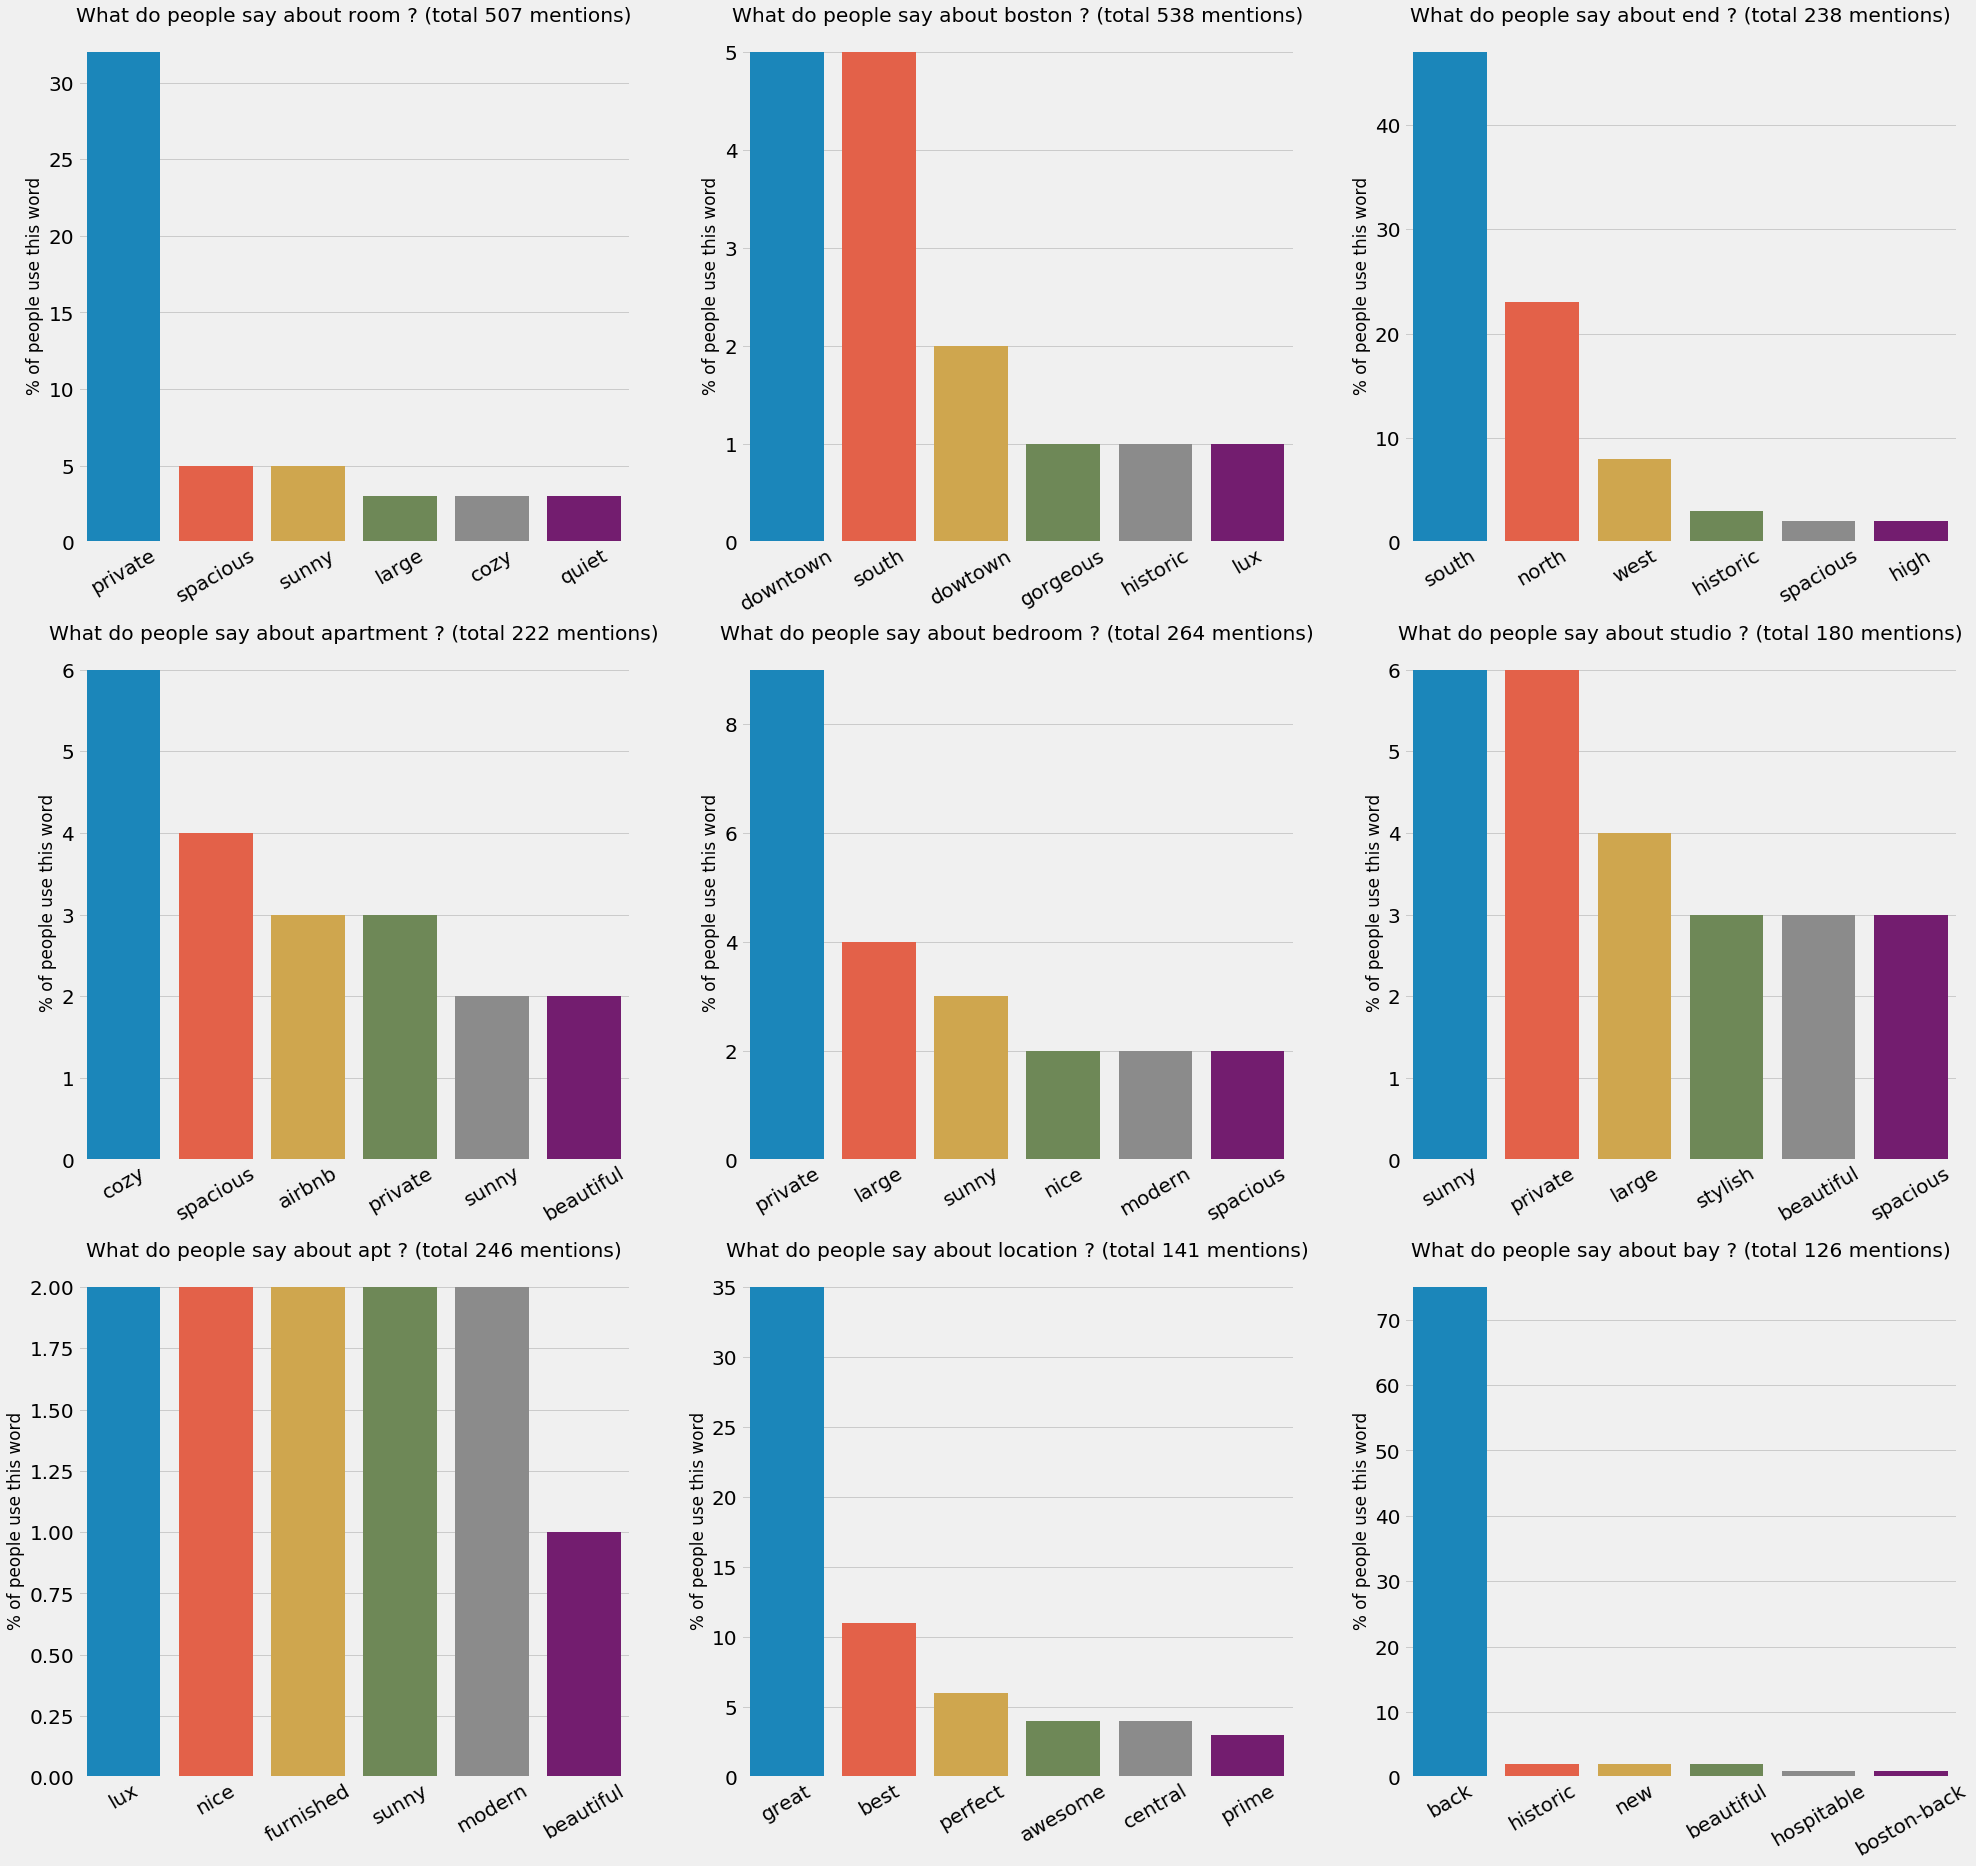

In [46]:
quick_aspect_opinion_view(listings, 'id', 'name')

Aspect Opinion Extractor: 2019-08-03 12:50:08.236450
0.067 min later: finished 13.95%
0.13 min later: finished 27.89%
0.18 min later: finished 41.84%
0.25 min later: finished 55.79%
0.32 min later: finished 69.74%
0.38 min later: finished 83.68%
0.45 min later: finished 97.63%


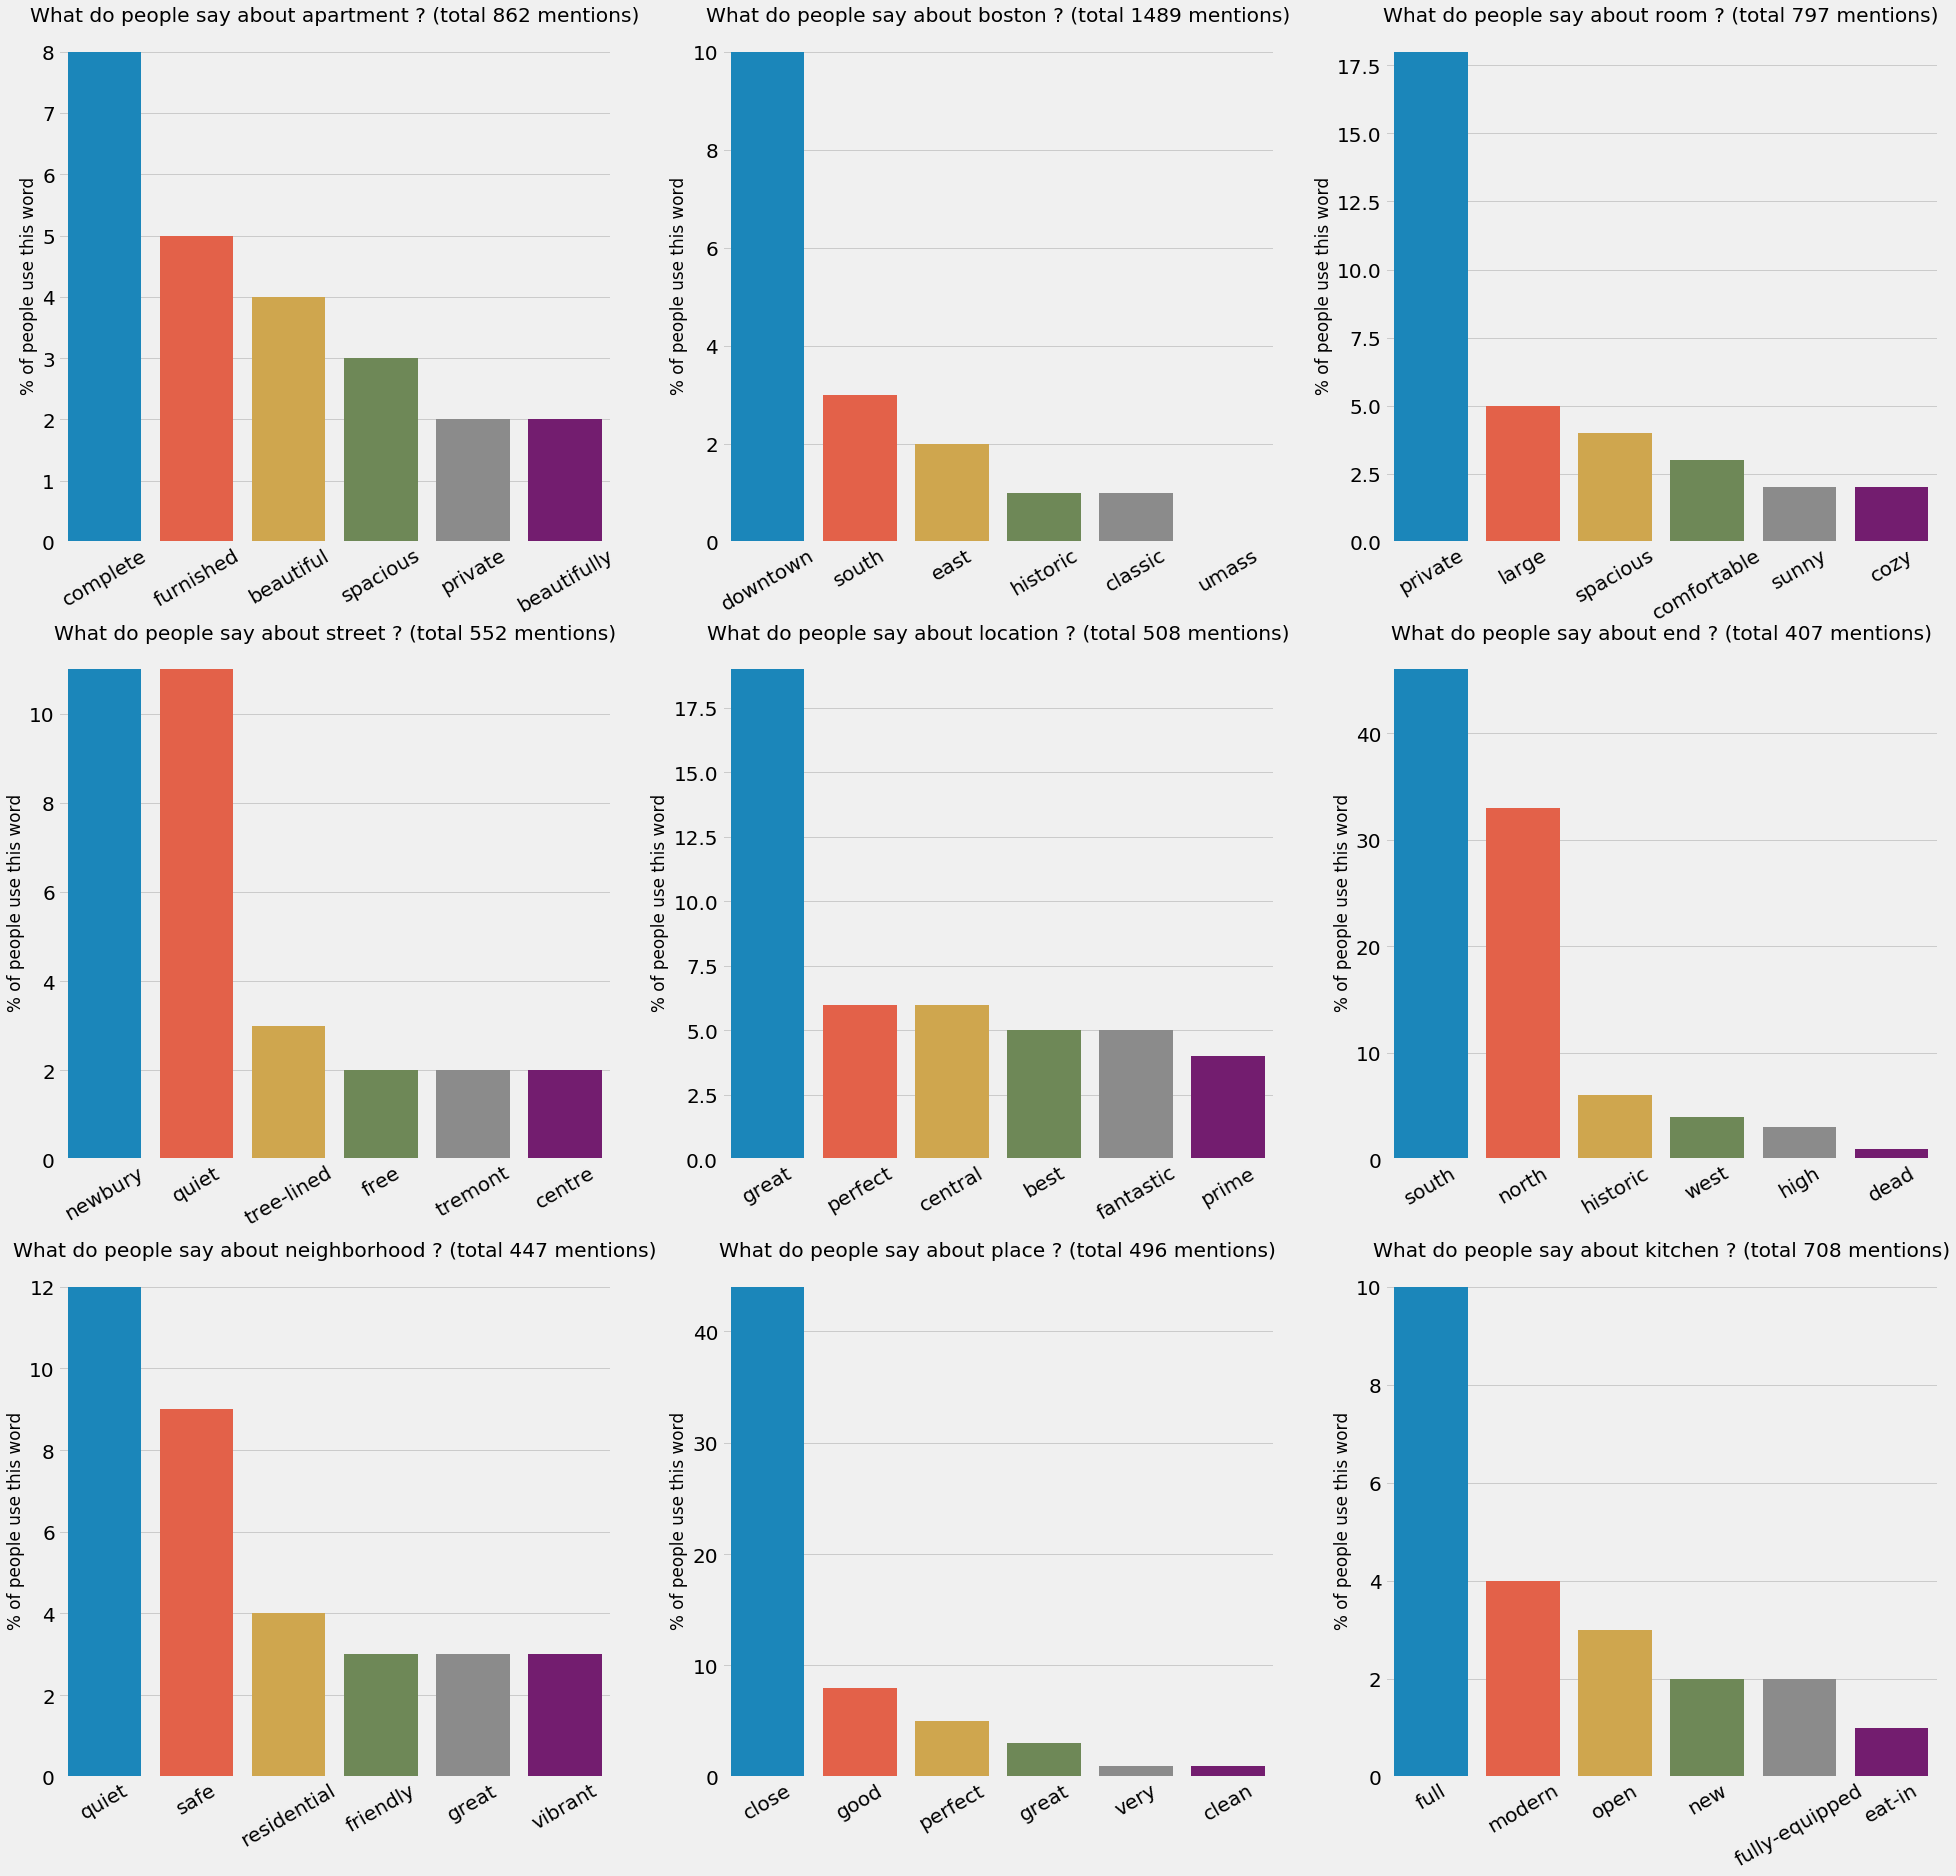

In [47]:
quick_aspect_opinion_view(listings, 'id', 'summary')

> ### Space

In the space field of the of listings, hosts love to mention `kitchen`, `size of the bed`, `floor the aparment is on` and `bathroom`

Aspect Opinion Extractor: 2019-08-03 12:50:40.695942
0.1 min later: finished 13.95%
0.2 min later: finished 27.89%
0.32 min later: finished 41.84%
0.42 min later: finished 55.79%
0.5 min later: finished 69.74%
0.57 min later: finished 83.68%
0.67 min later: finished 97.63%


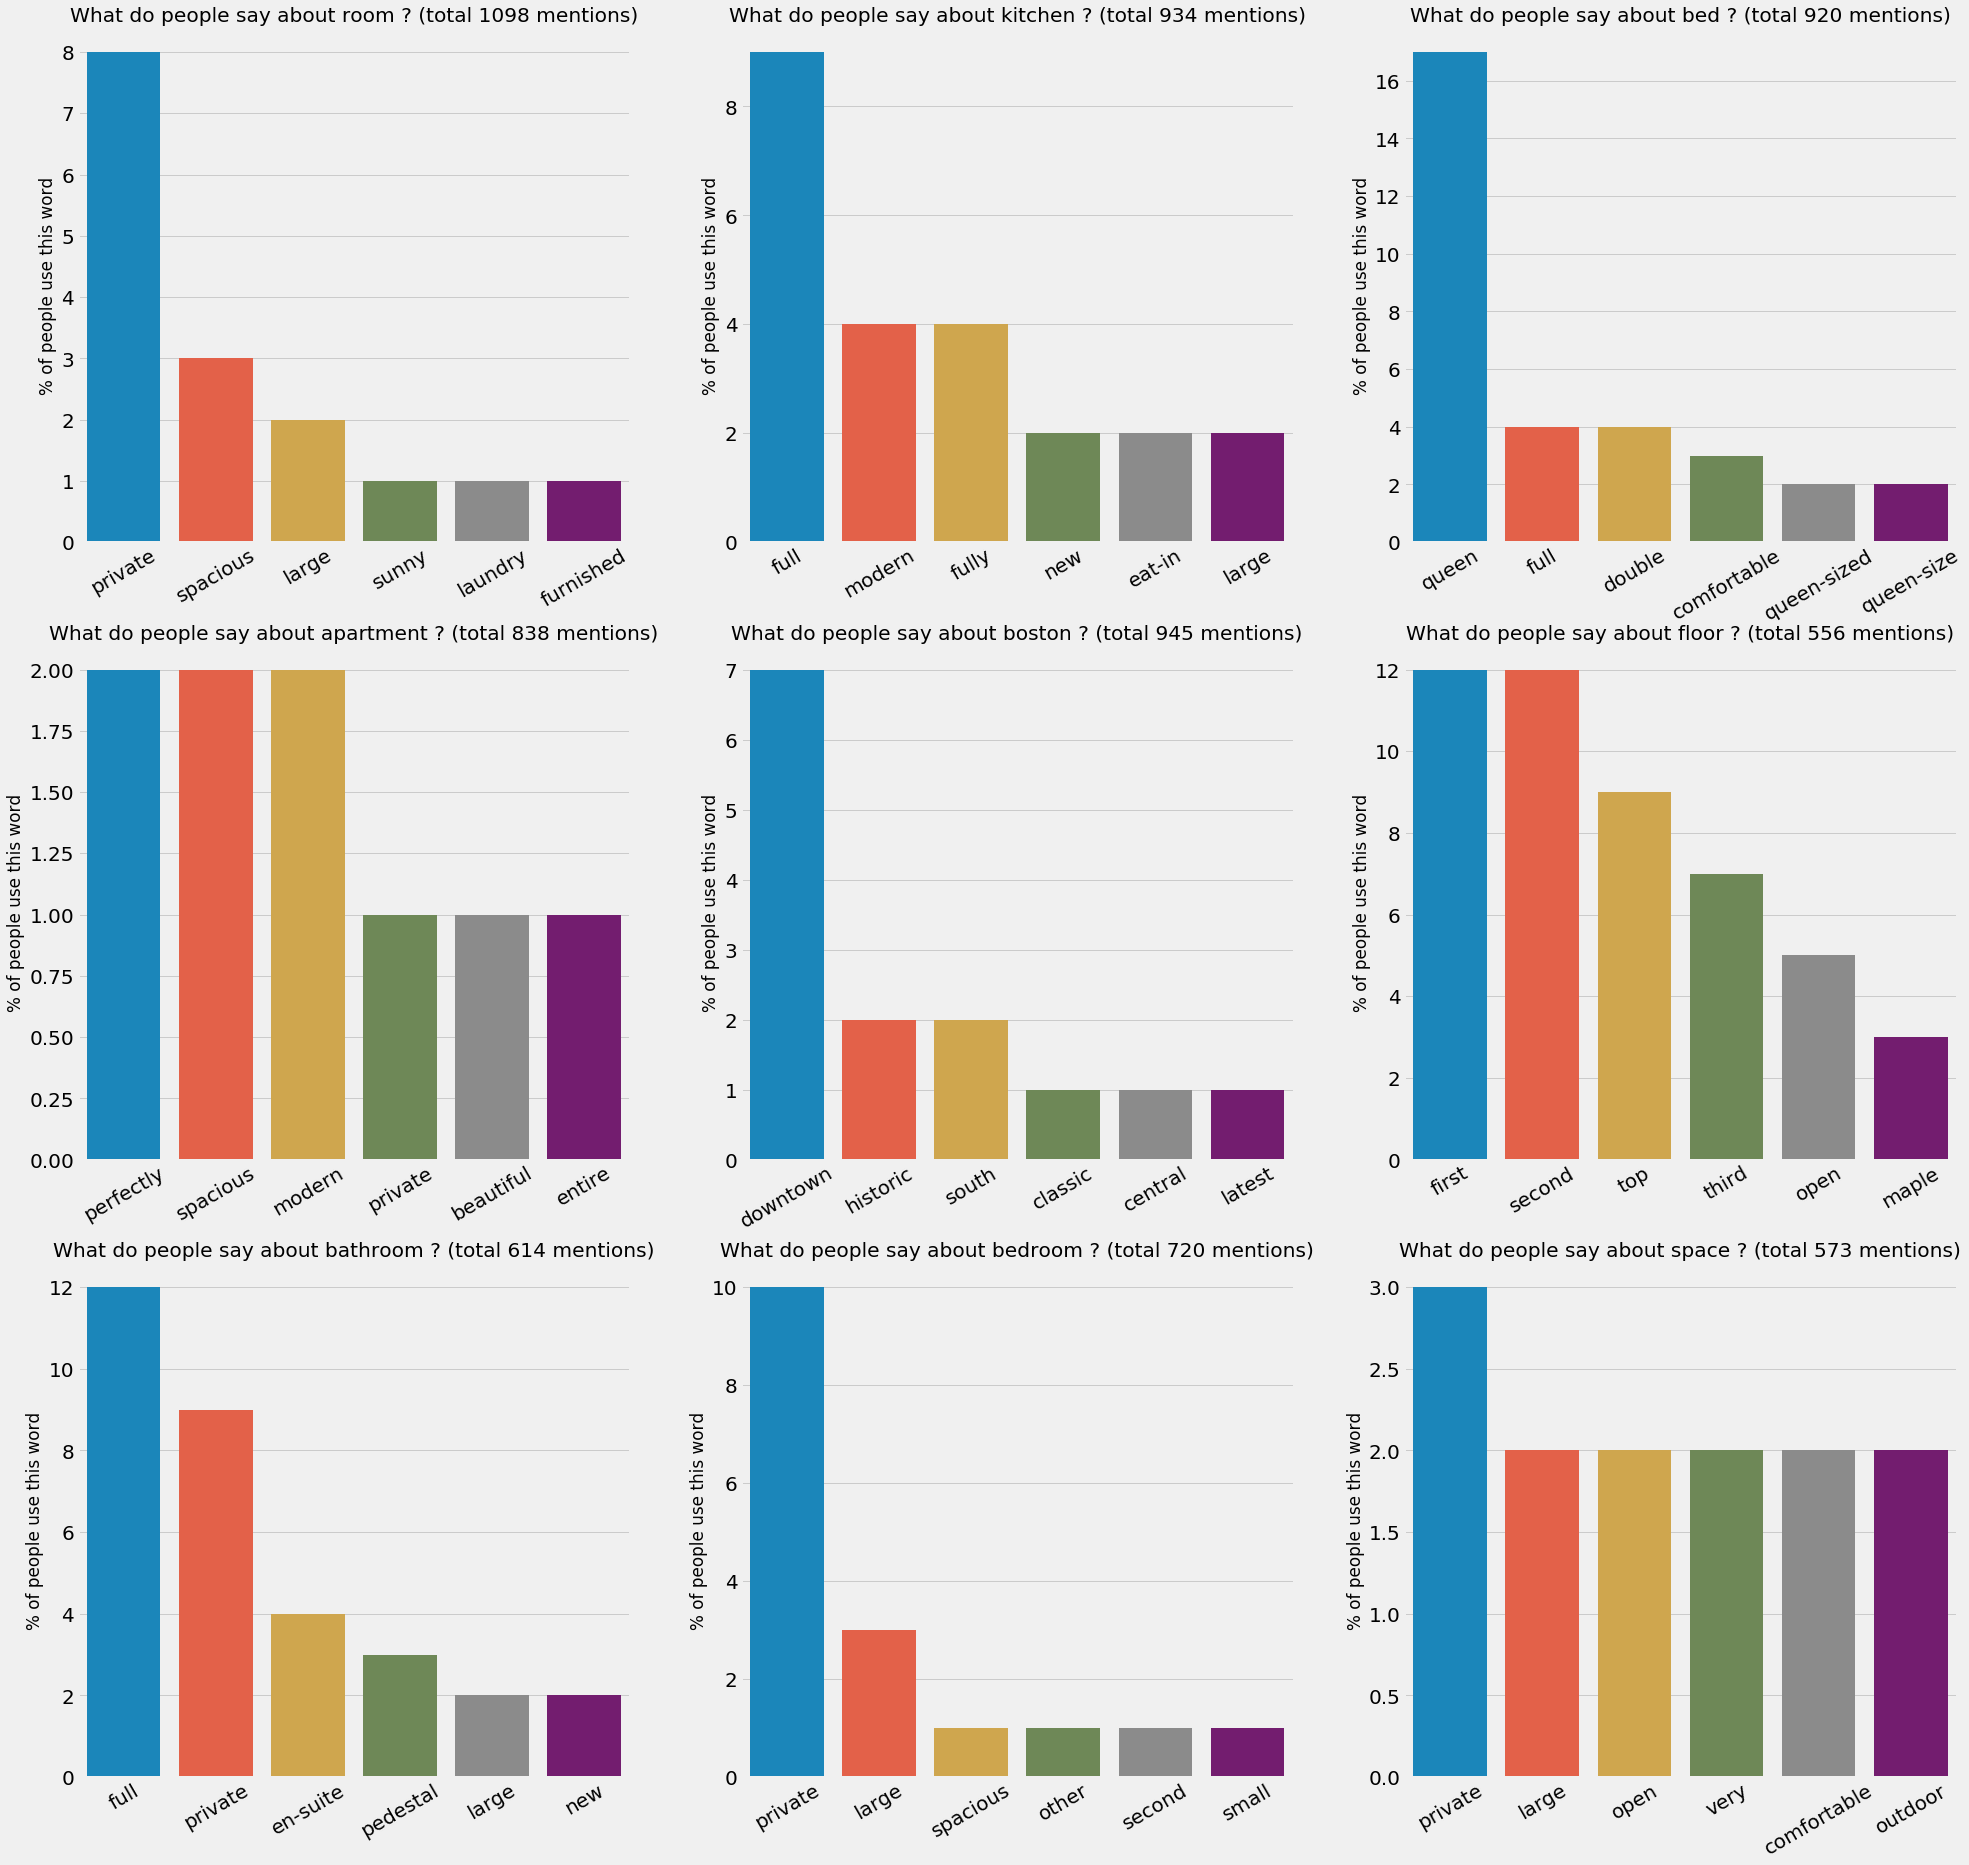

In [48]:
quick_aspect_opinion_view(listings, 'id', 'space')

> ### Neighborhood

In the neighborhood field of the of listings, hosts love to mention `quite`, `residential`, `safe`, `historic`, `fashionable and antique shops` and `short walk`.

Aspect Opinion Extractor: 2019-08-03 12:51:47.996453
0.067 min later: finished 13.95%
0.12 min later: finished 27.89%
0.18 min later: finished 41.84%
0.23 min later: finished 55.79%
0.28 min later: finished 69.74%
0.33 min later: finished 83.68%
0.38 min later: finished 97.63%


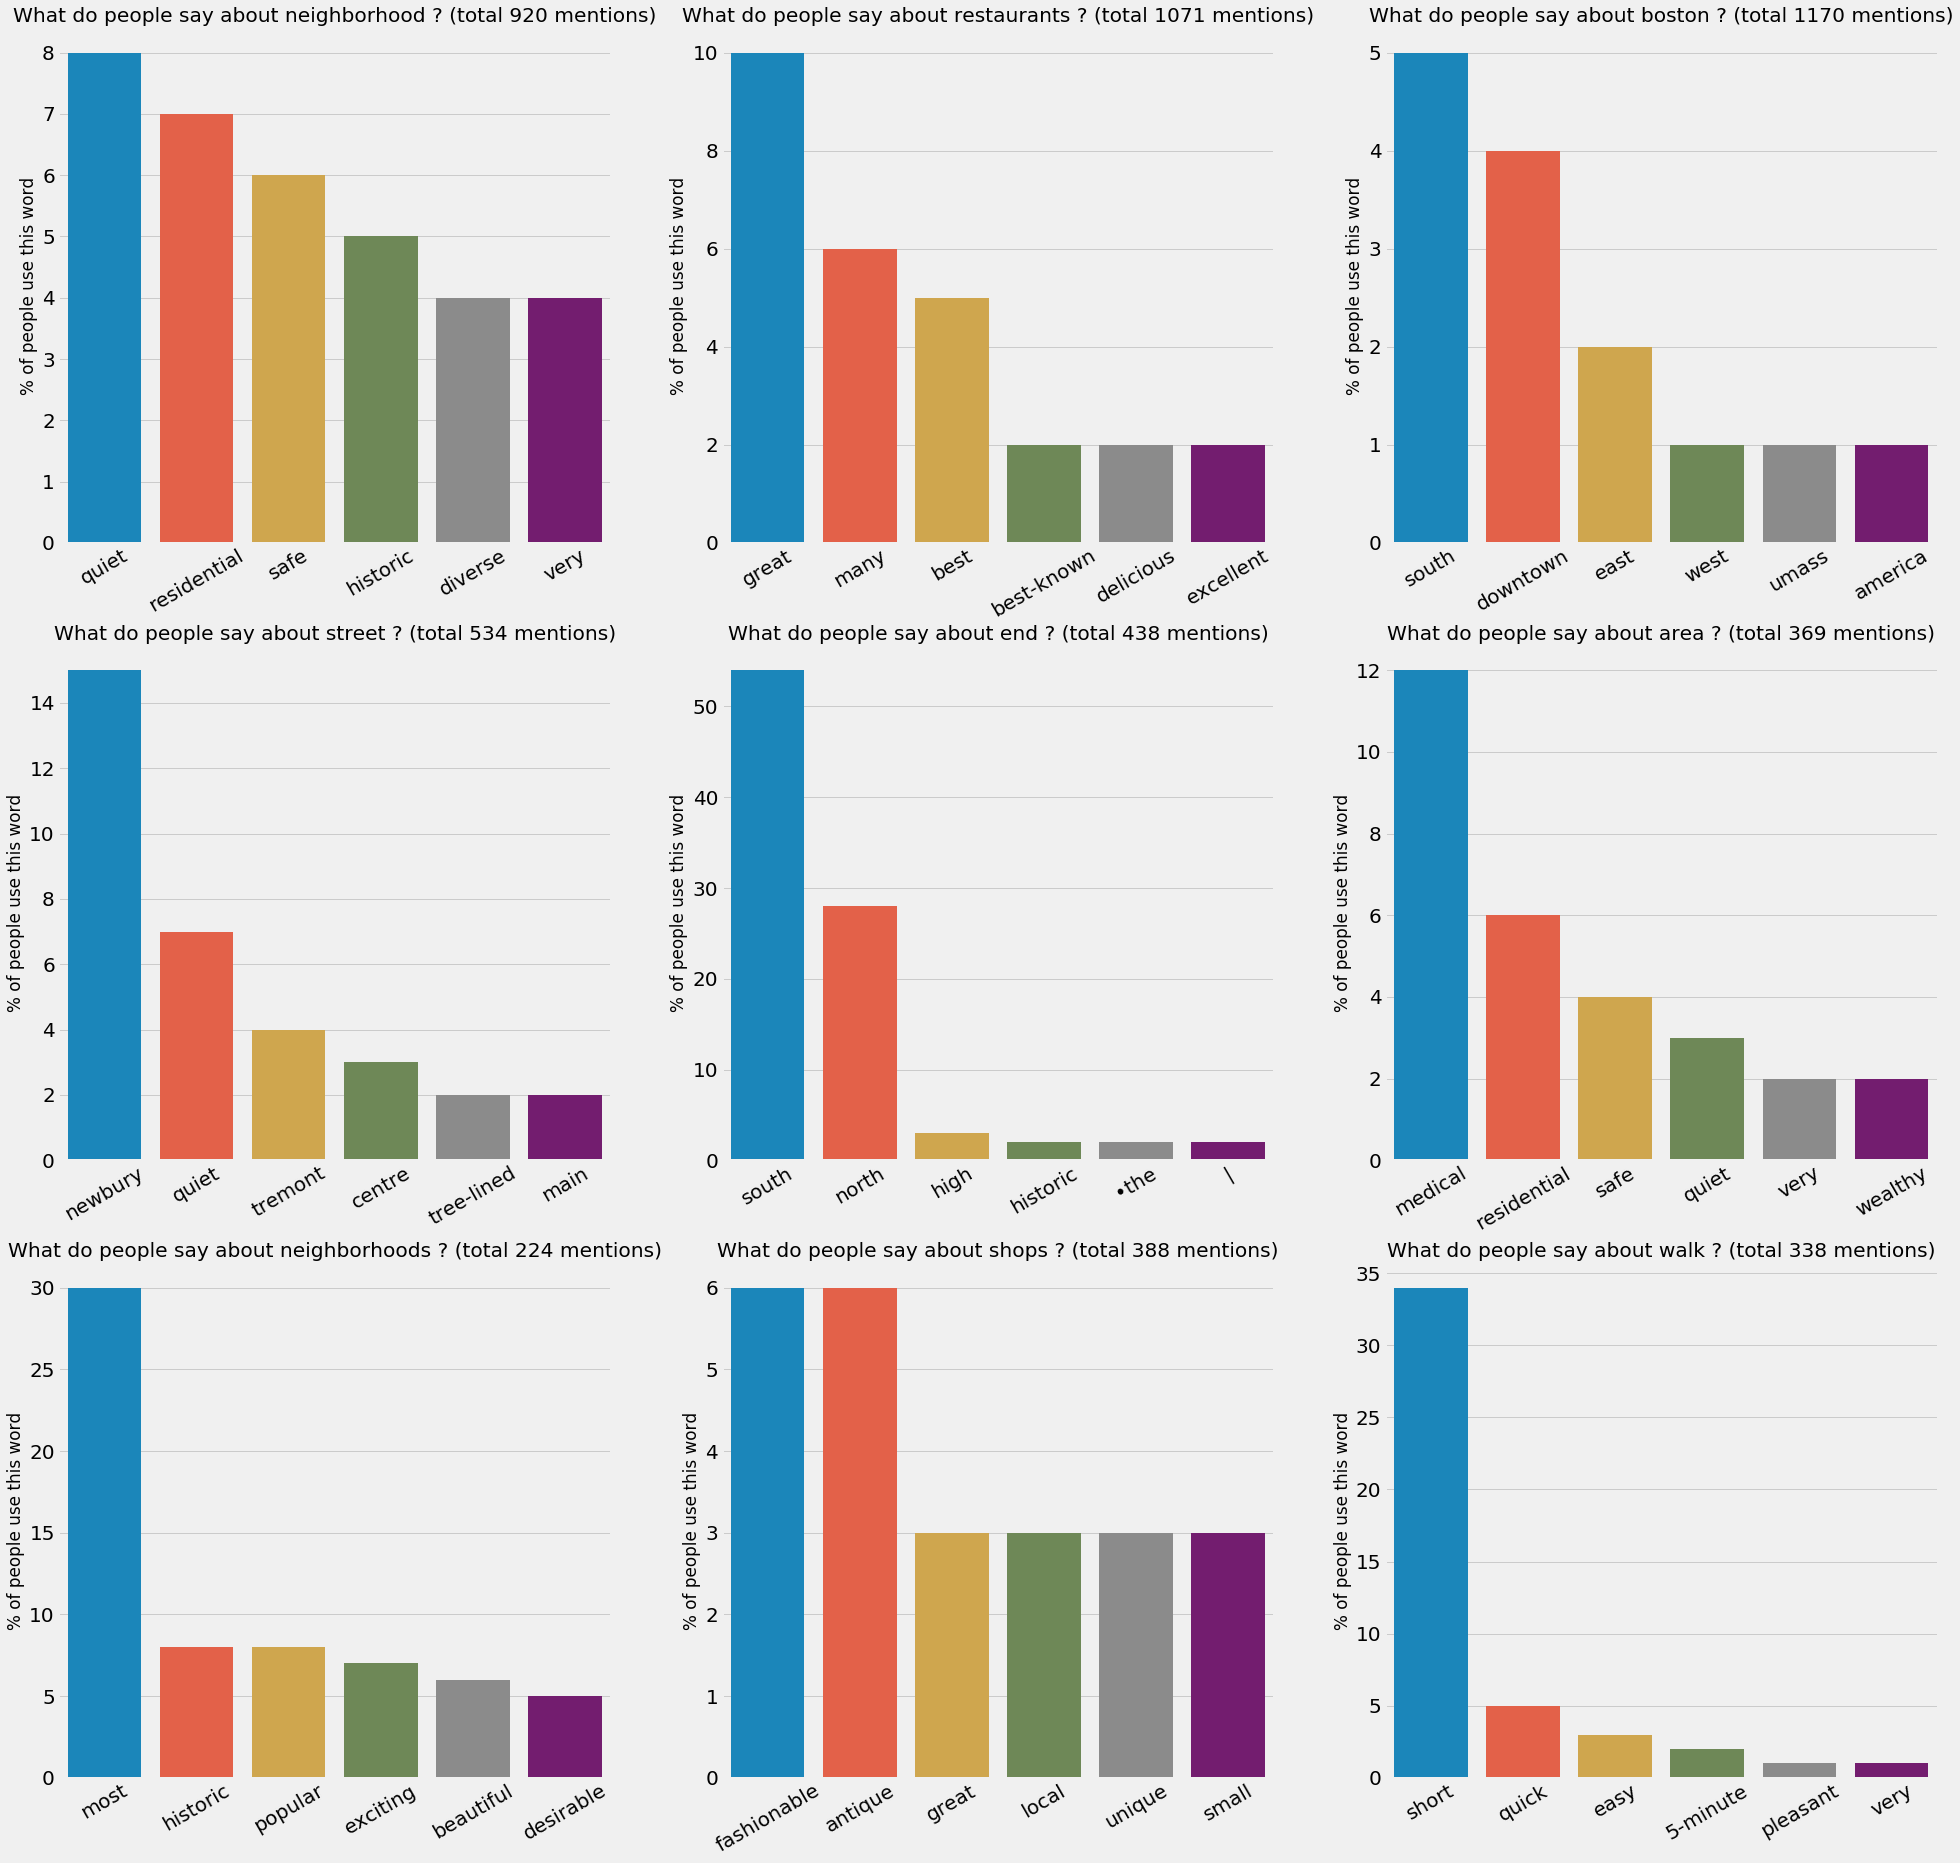

In [49]:
quick_aspect_opinion_view(listings, 'id', 'neighborhood_overview')

> ### Transit

It seems that green and red lines are the popular lines in Boston. Other popular aspects includes `airport` and `parking`.

Aspect Opinion Extractor: 2019-08-03 12:52:53.534017
0.05 min later: finished 13.95%
0.12 min later: finished 27.89%
0.17 min later: finished 41.84%
0.22 min later: finished 55.79%
0.27 min later: finished 69.74%
0.32 min later: finished 83.68%
0.37 min later: finished 97.63%


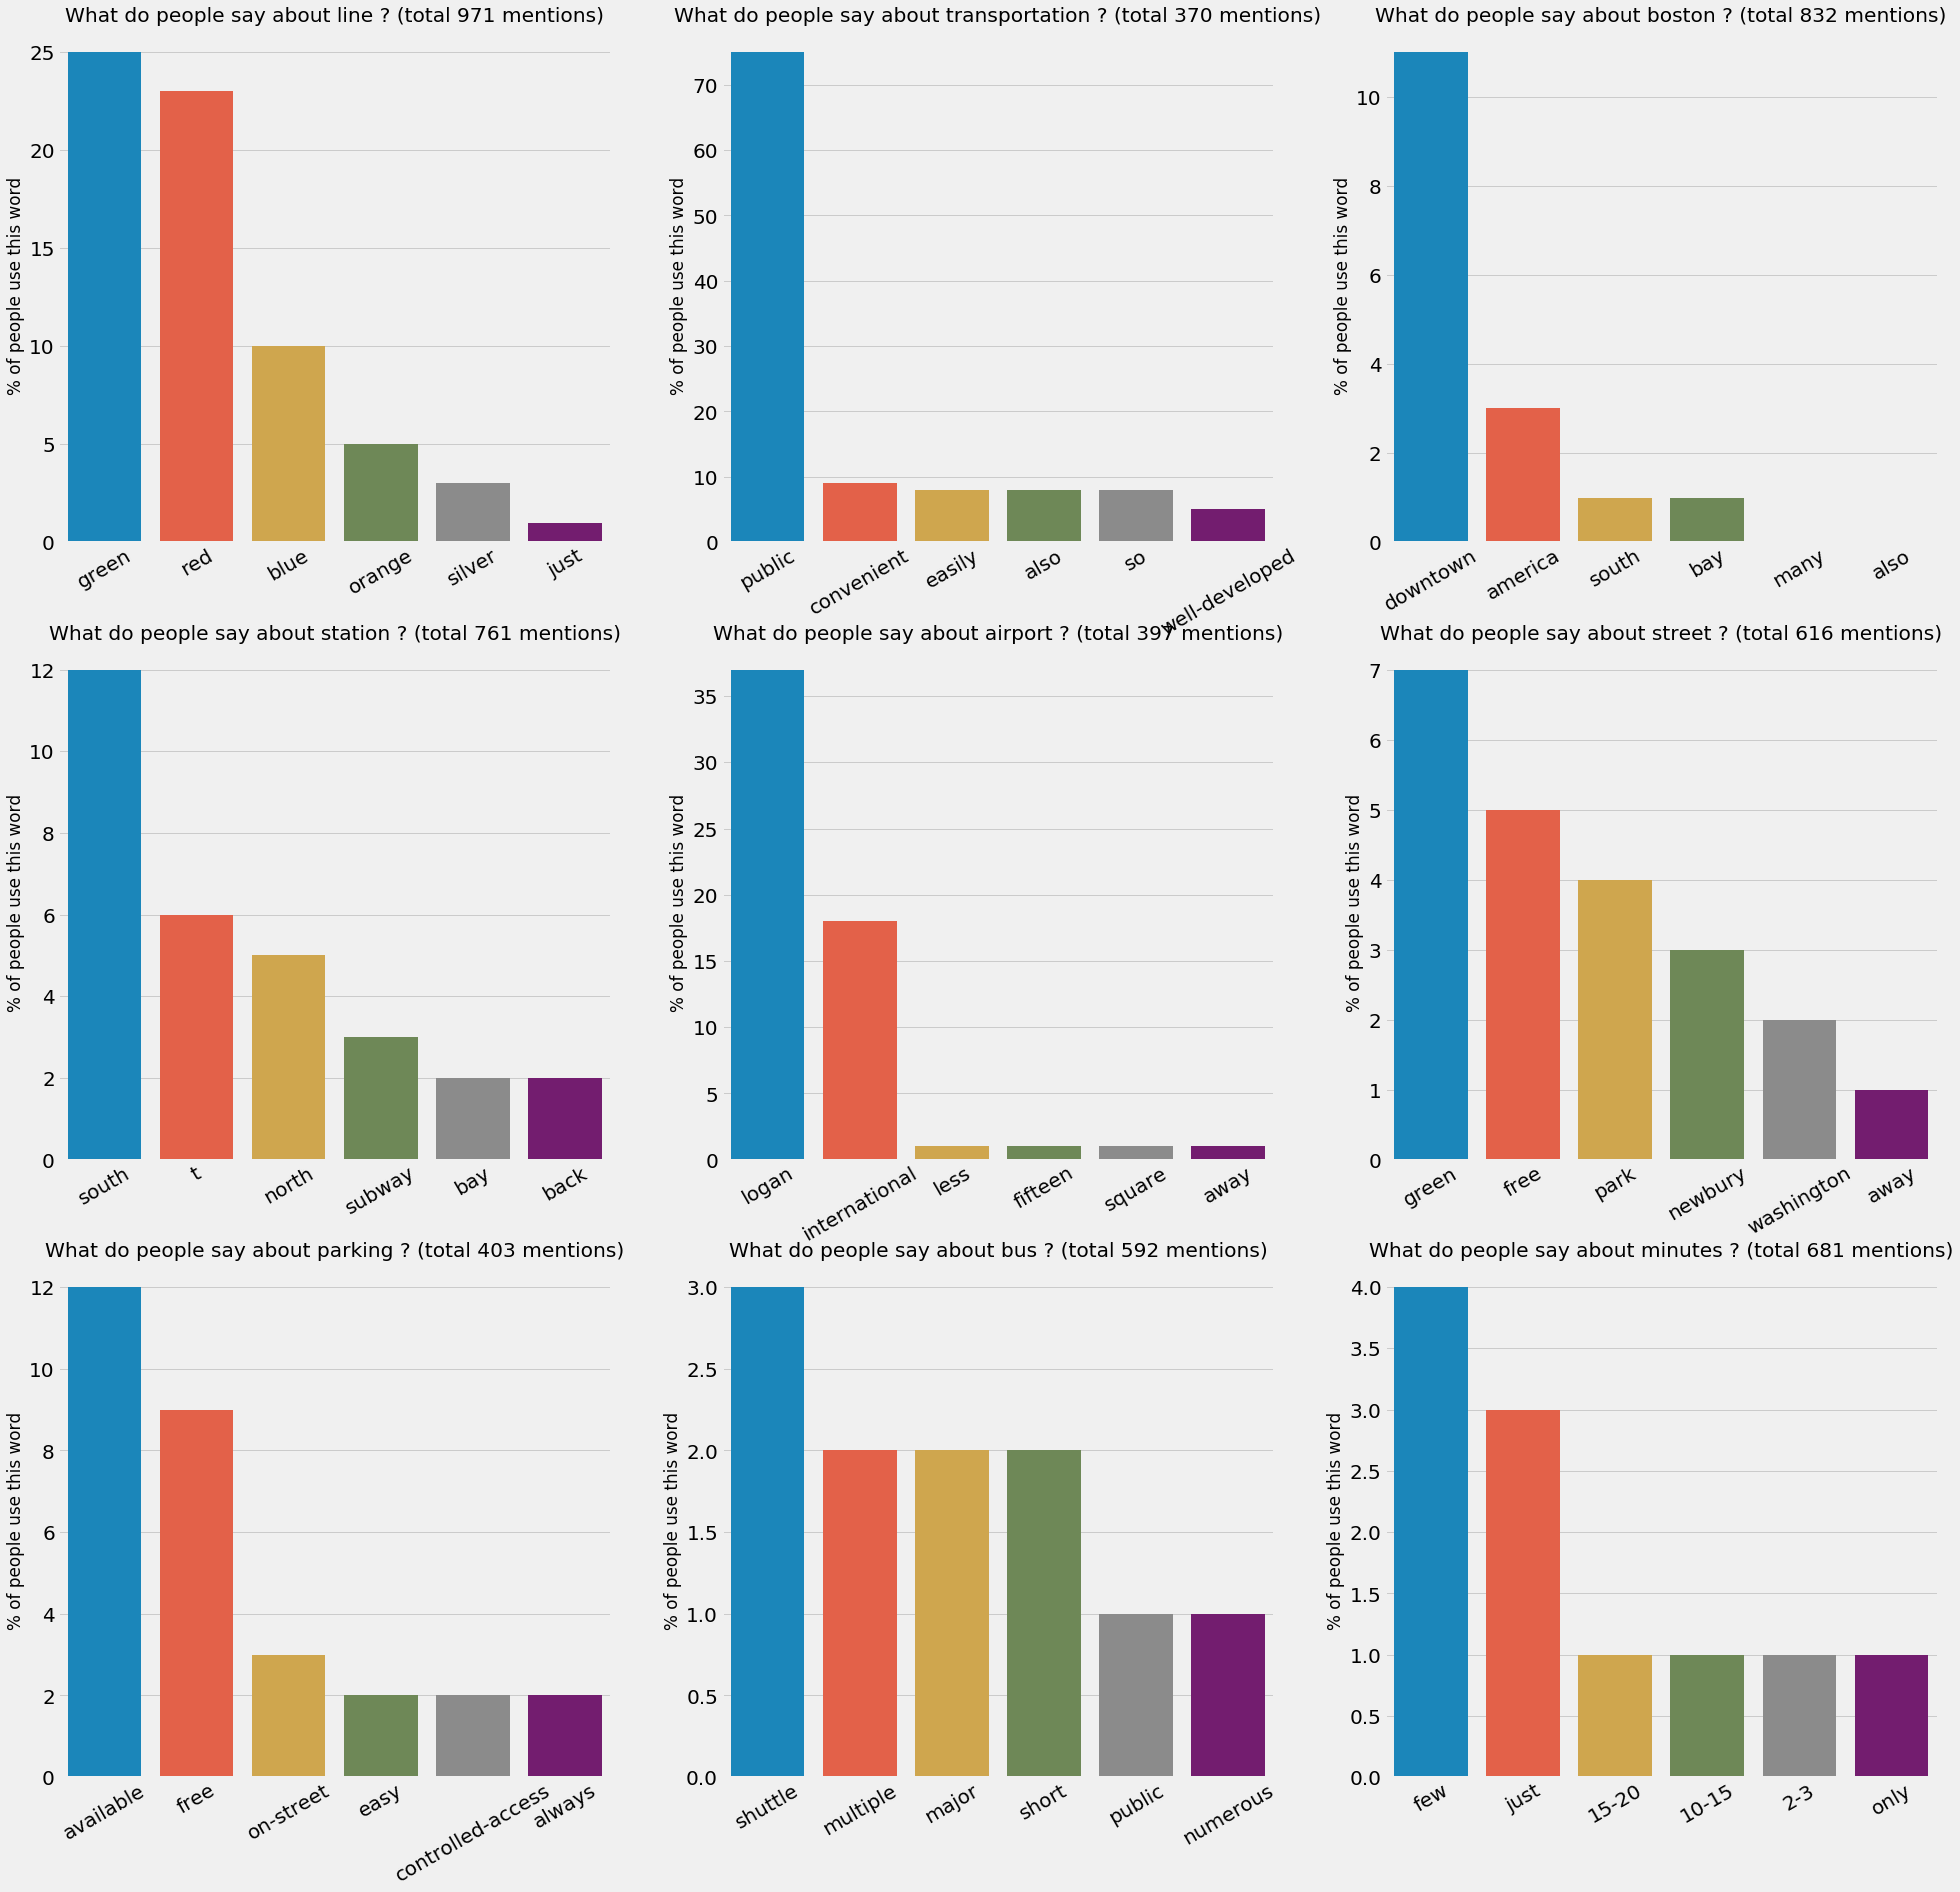

In [52]:
quick_aspect_opinion_view(listings, 'id', 'transit')

> ### House rules

Popular aspects in house rules include `guests`, `smoking`, `pets` and `parties`.

Aspect Opinion Extractor: 2019-08-03 12:57:09.996336
0.05 min later: finished 13.95%
0.12 min later: finished 27.89%
0.17 min later: finished 41.84%
0.22 min later: finished 55.79%
0.25 min later: finished 69.74%
0.3 min later: finished 83.68%
0.37 min later: finished 97.63%


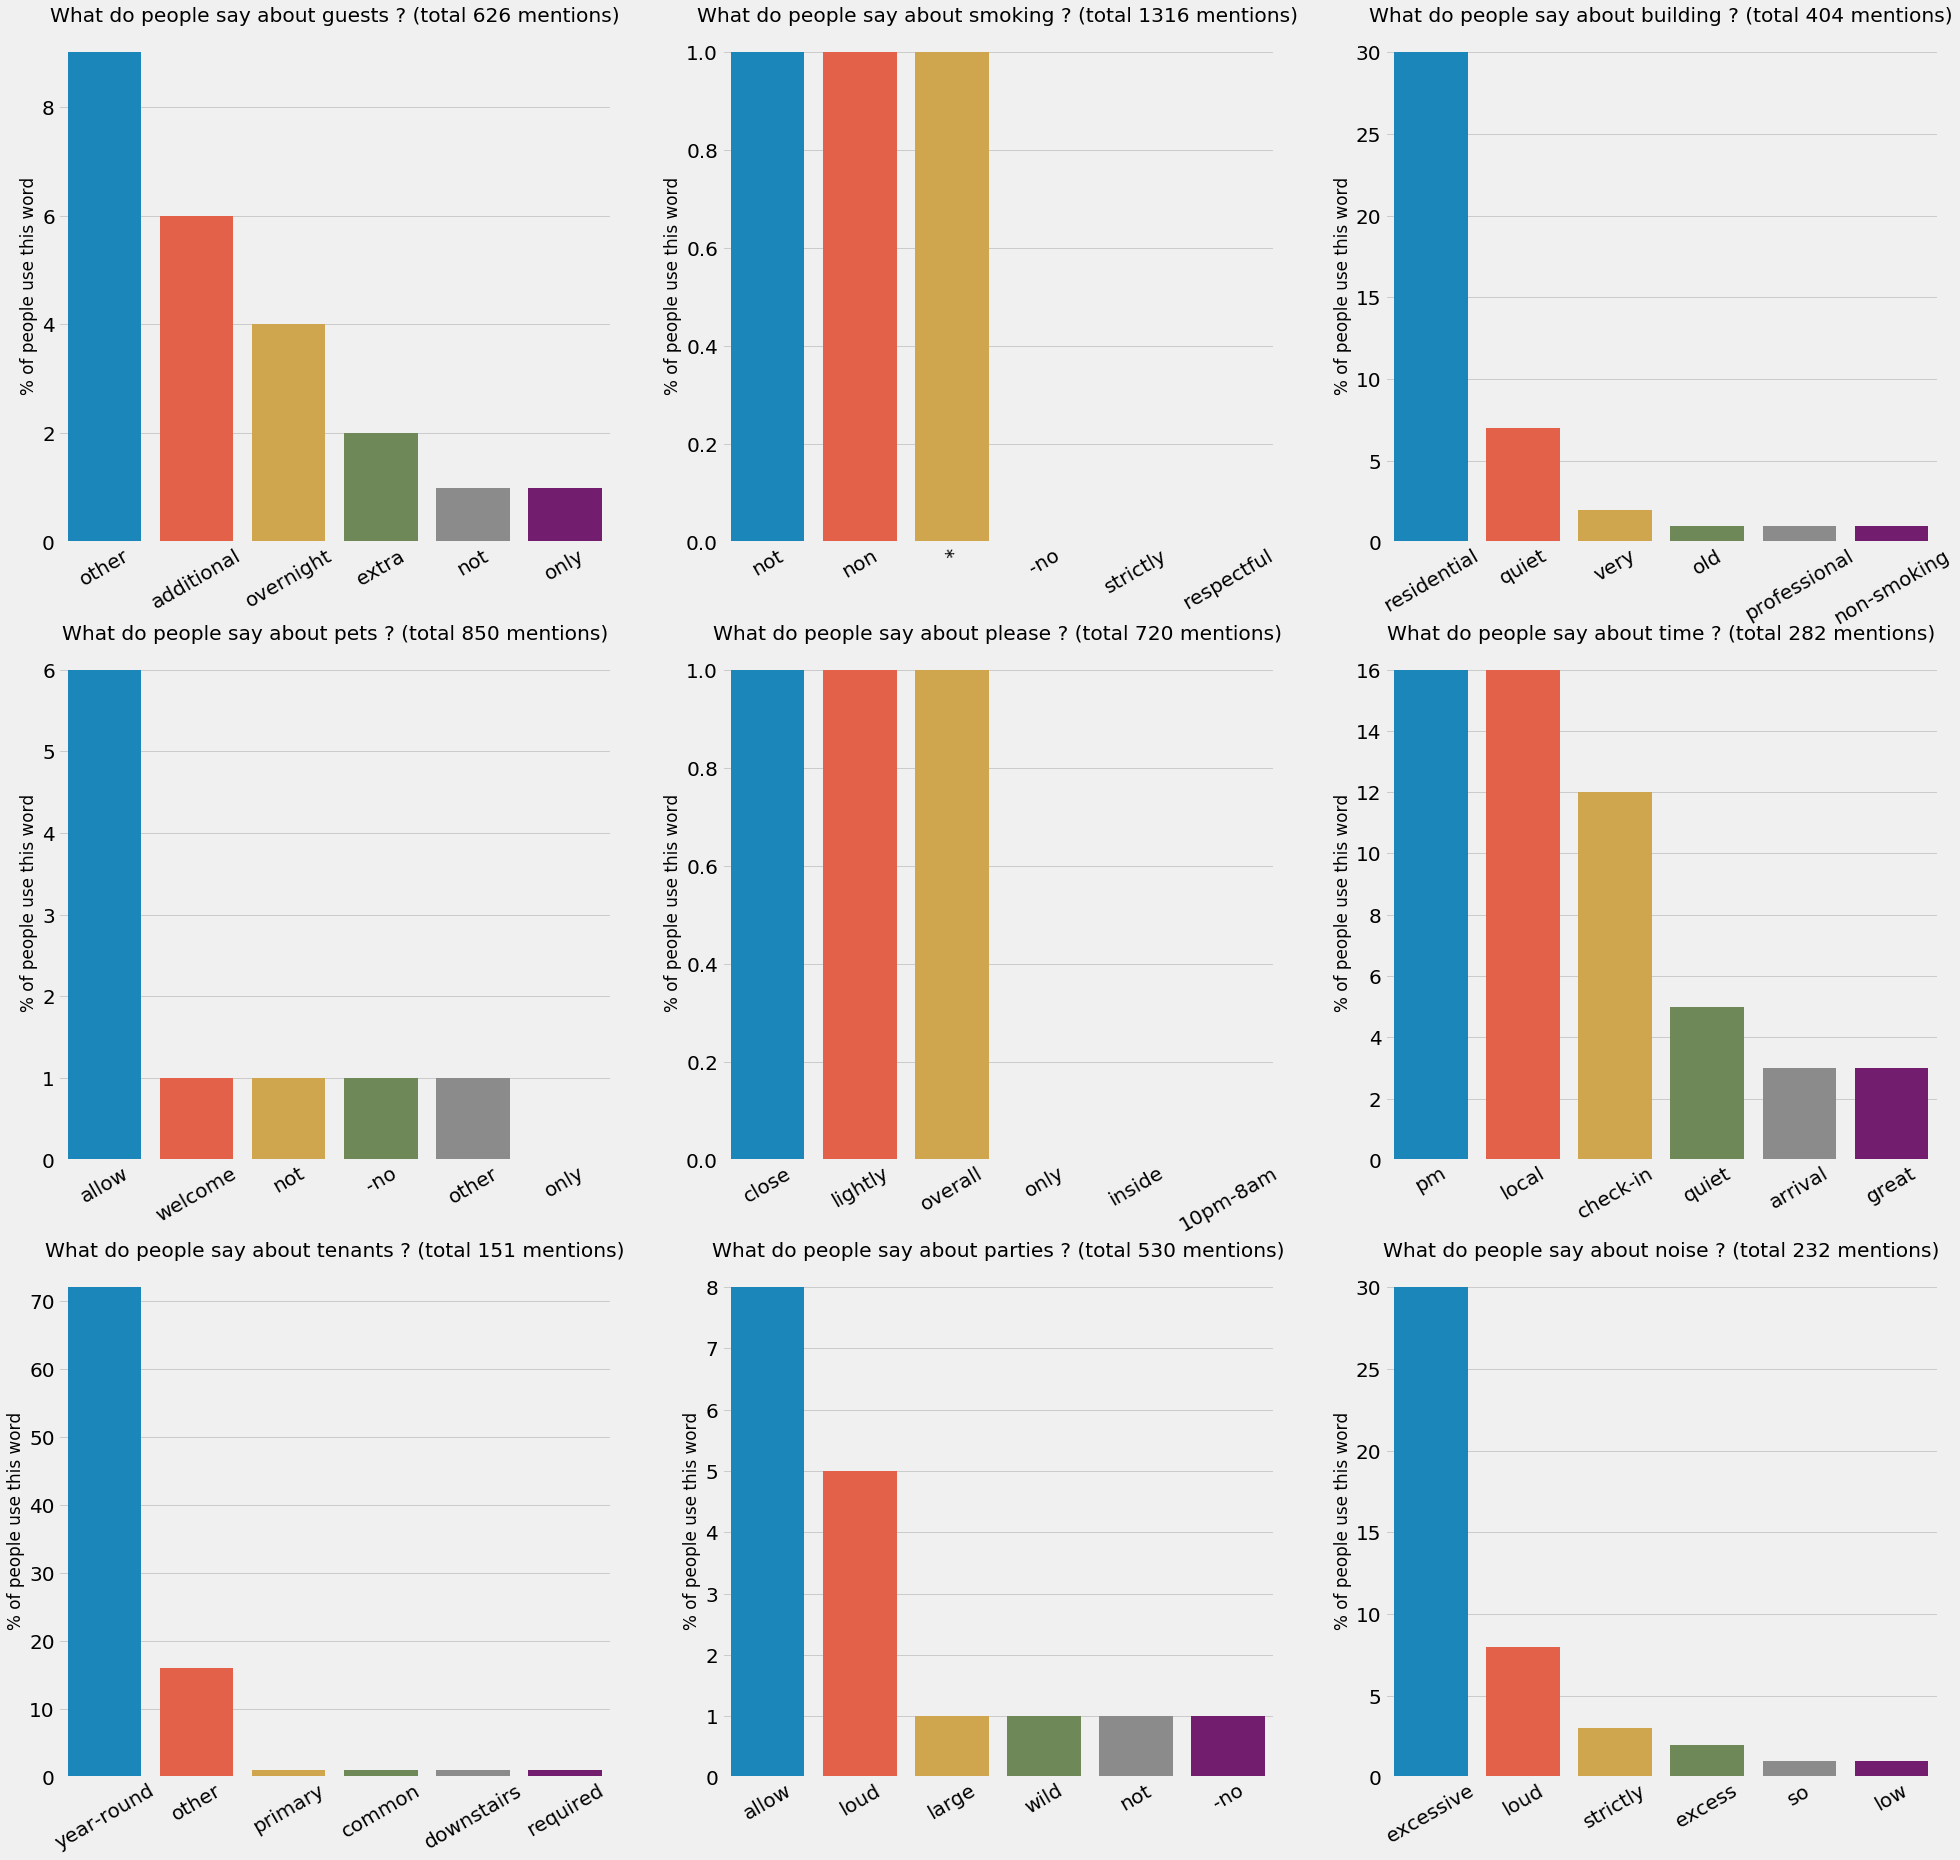

In [54]:
quick_aspect_opinion_view(listings, 'id', 'house_rules')

### 2.1.2 Catogorical/Numerical Data

In [5]:
today = date.today()

In [6]:
datetime.datetime.today().strftime('%Y-%m-%d')

'2019-08-03'

> ### Information about the hosts

We created the visualizations of the information of the hosts. We can see that we have more and more hosts in recent years. The response rates and acceptance rates are in general very high. Only a small portion of the hosts are superhosts. Most hosts have less than 10 listings while there are some hosts that have several hundreds of listings. About 30% of the hosts haven't had identity verified yet.

In [22]:
host_age = listings['host_since'].apply(lambda x: (datetime.datetime.today() - pd.to_datetime(x)).days/365)
reponse_rate = listings['host_response_rate'].dropna().apply(lambda x: float(x.split("%")[0])/100)
acceptance_rate = listings['host_acceptance_rate'].dropna().apply(lambda x: float(x.split("%")[0])/100)

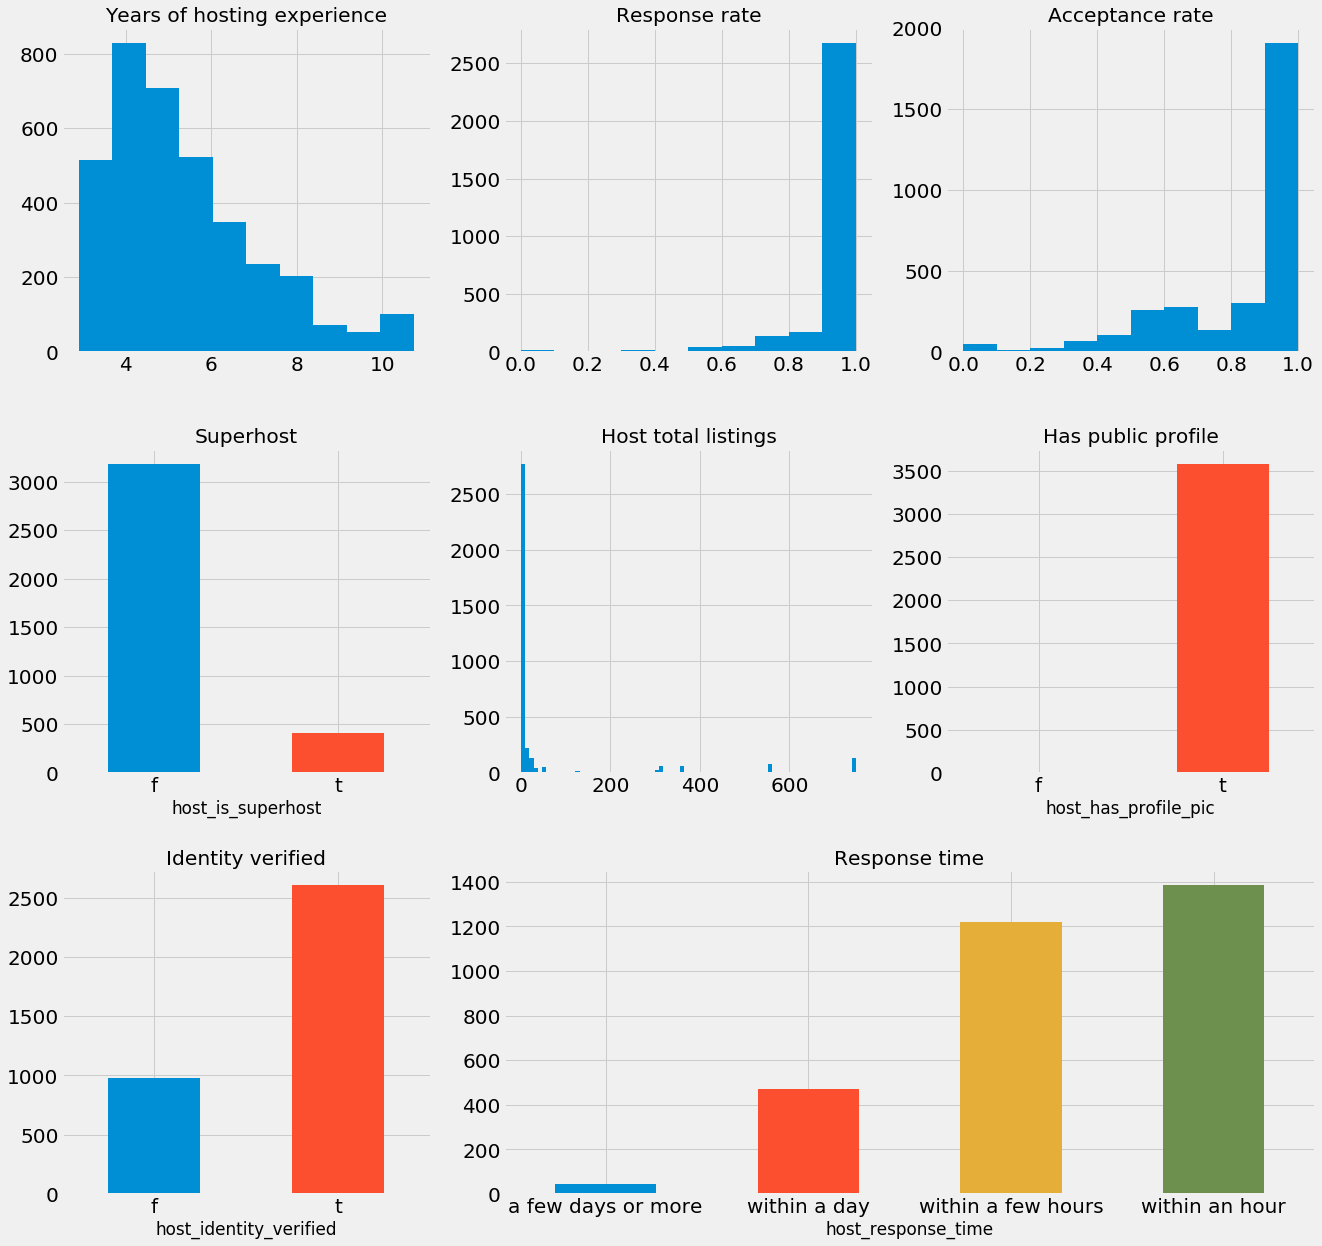

In [96]:
plt.rcParams['figure.figsize'] = (20,20)

plt.subplot(3,3,1)
plt.hist(host_age)
plt.title('Years of hosting experience')

plt.subplot(3,3,2)
plt.hist(reponse_rate)
plt.title('Response rate')

plt.subplot(3,3,3)
plt.hist(acceptance_rate)
plt.title('Acceptance rate')

plt.subplot(3,3,4)
listings.groupby('host_is_superhost').count()['id'].plot.bar()
plt.xticks(rotation = 0)
plt.title('Superhost')

plt.subplot(3,3,5)
plt.hist(listings['host_total_listings_count'], bins=80)
plt.title('Host total listings')

plt.subplot(3,3,6)
listings.groupby('host_has_profile_pic').count()['id'].plot.bar()
plt.xticks(rotation = 0)
plt.title('Has public profile')

plt.subplot(3,3,7)
listings.groupby('host_identity_verified').count()['id'].plot.bar()
plt.xticks(rotation = 0)
plt.title('Identity verified')

plt.subplot(3,3,(8,9))
listings.groupby('host_response_time').count()['id'].plot.bar()
plt.xticks(rotation = 0)
plt.title('Response time')

plt.subplots_adjust(hspace = 0.3)

> ### Information about the rooms

We can see the popular neighborhoods below. Most of the properties are apartments. The listings mostly offer 1 bedrooms targeting 1-2 guests.

/Users/tianyiwang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning:

invalid value encountered in greater_equal

/Users/tianyiwang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning:

invalid value encountered in less_equal



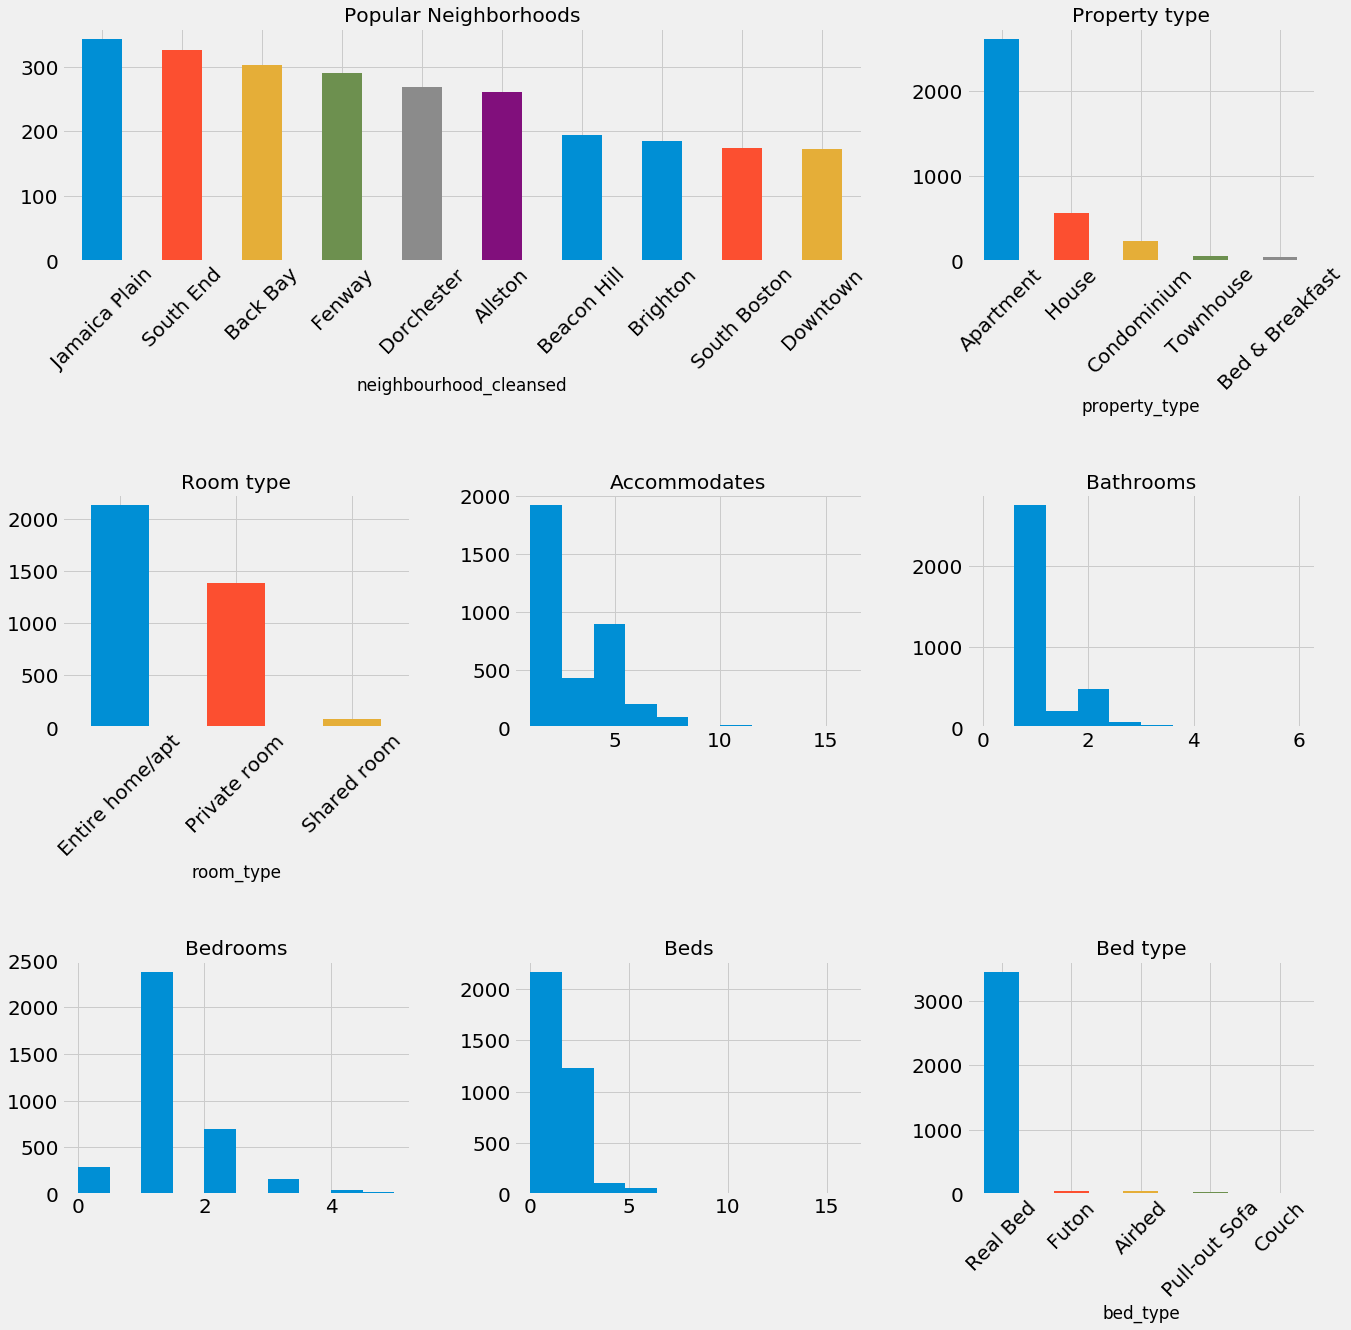

In [110]:
plt.rcParams['figure.figsize'] = (20,20)

plt.subplot(3,3,(1,2))
listings.groupby('neighbourhood_cleansed').count()['id'].sort_values(ascending=False)[:10].plot.bar()
plt.xticks(rotation = 45)
plt.title('Popular Neighborhoods')

plt.subplot(3,3,3)
listings.groupby('property_type').count()['id'].sort_values(ascending=False)[:5].plot.bar()
plt.xticks(rotation = 45)
plt.title('Property type')

plt.subplot(3,3,4)
listings.groupby('room_type').count()['id'].sort_values(ascending=False)[:5].plot.bar()
plt.xticks(rotation = 45)
plt.title('Room type')

plt.subplot(3,3,5)
plt.hist(listings['accommodates'])
plt.title('Accommodates')

plt.subplot(3,3,6)
plt.hist(listings['bathrooms'])
plt.title('Bathrooms')

plt.subplot(3,3,7)
plt.hist(listings['bedrooms'])
plt.title('Bedrooms')

plt.subplot(3,3,8)
plt.hist(listings['beds'])
plt.title('Beds')

plt.subplot(3,3,9)
listings.groupby('bed_type').count()['id'].sort_values(ascending=False)[:5].plot.bar()
plt.xticks(rotation = 45)
plt.title('Bed type')

plt.subplots_adjust(wspace = 0.3)
plt.subplots_adjust(hspace = 1)

In terms of amenities, we listed all the amenities mentioned:

In [151]:
amenities = list(set(listings['amenities'].apply(lambda x: x[1:-1].replace("\"","").split(",")).sum()))
amenities = [i for i in amenities if i!=""]
amenities_pd = listings[['amenities']]
for a in amenities:
    amenities_pd[a] = listings['amenities'].str.contains(a)

/Users/tianyiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/tianyiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.

/Users/tianyiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.

/Users/tianyiwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



Text(0.5, 1.0, '% of listings with certain amenity')

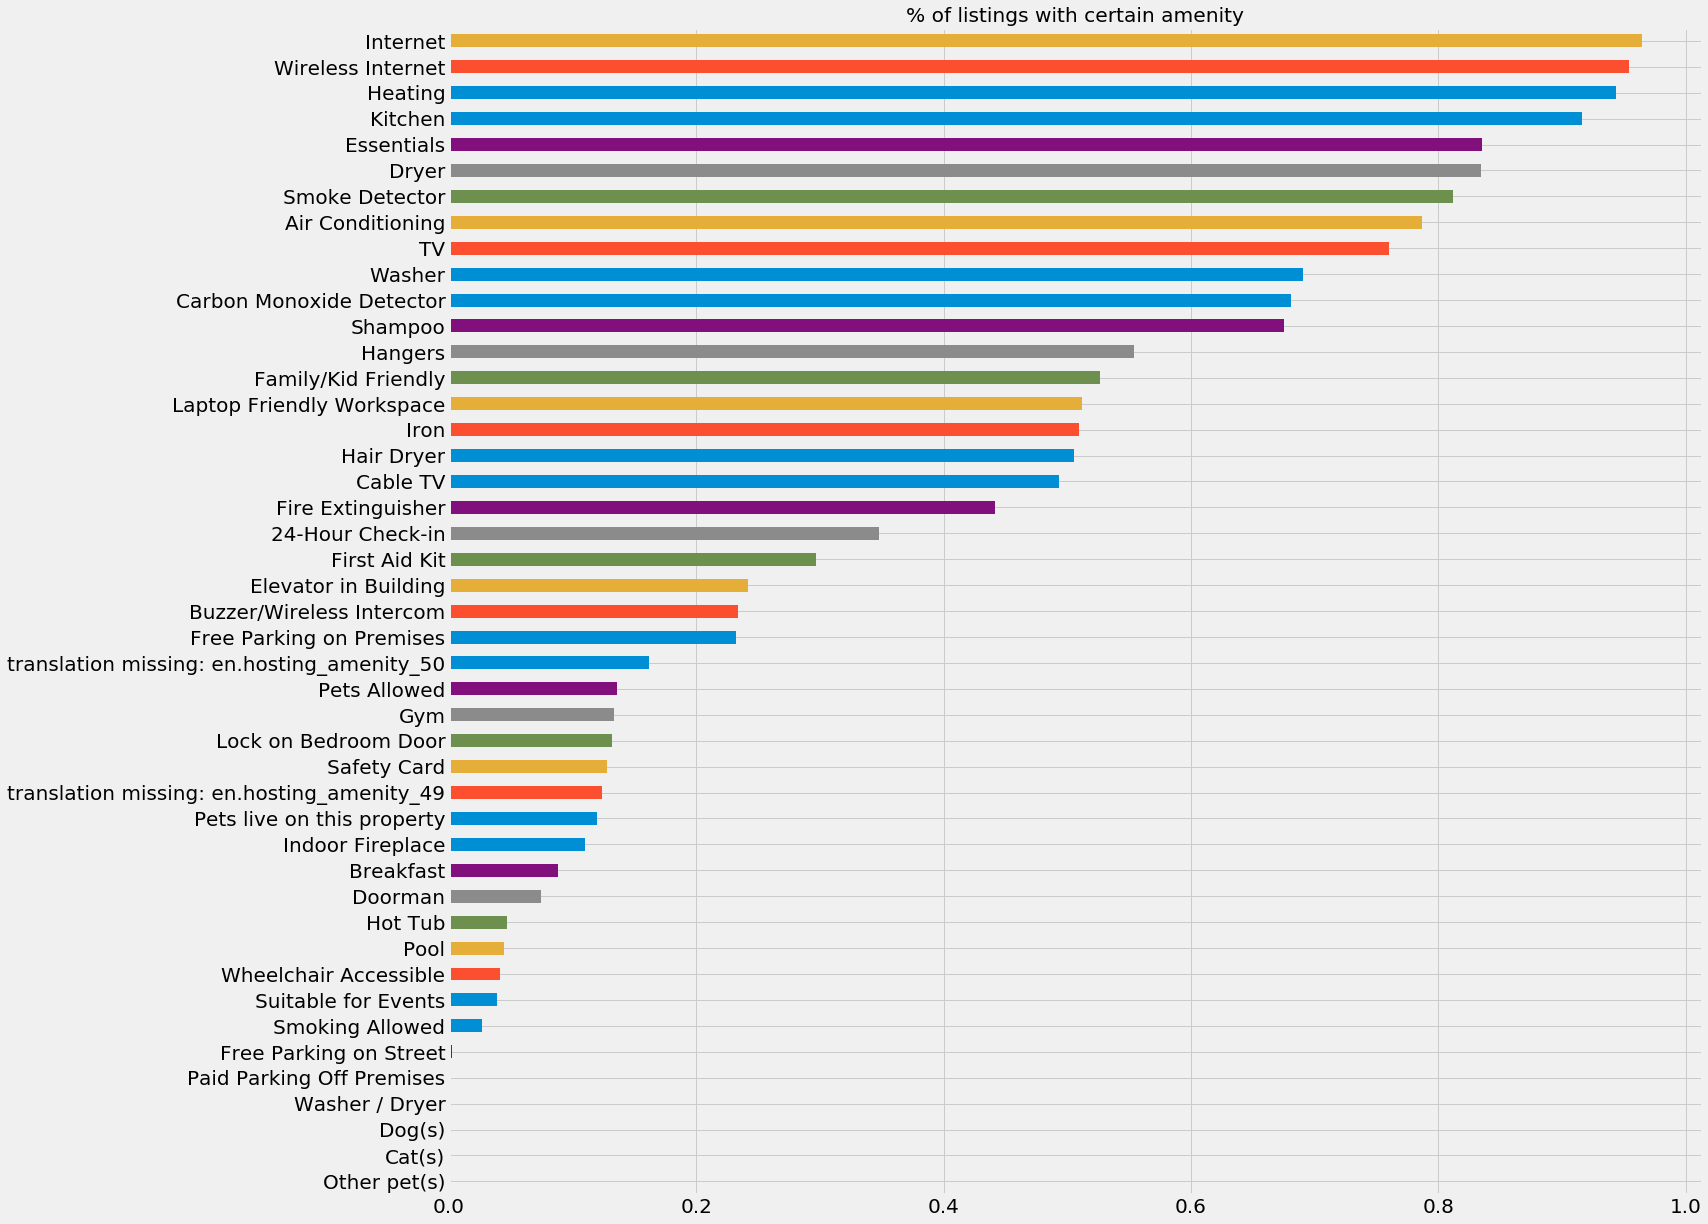

In [169]:
plt.rcParams['figure.figsize'] = (20,20)
amenities_pd.mean().sort_values().plot.barh()
plt.title("% of listings with certain amenity")

This is actually an interesting field. We can see that popular amenities are internet, heating, kitchen, essentials (probably stuffs like shampoo), dryer etc. There some amenites that only a few listings offer: gum, doorman, hot tub, pool... Listings with more rare amenities must have higher prices.

> ### Analysis on the review scores

About 75% of the listings have reivew scores. The distribution of the scores for various aspects are similar. Most of the listings get high scores. There are very few listings that have scores lower than 60.

Text(0.5, 1.0, 'review_scores_value')

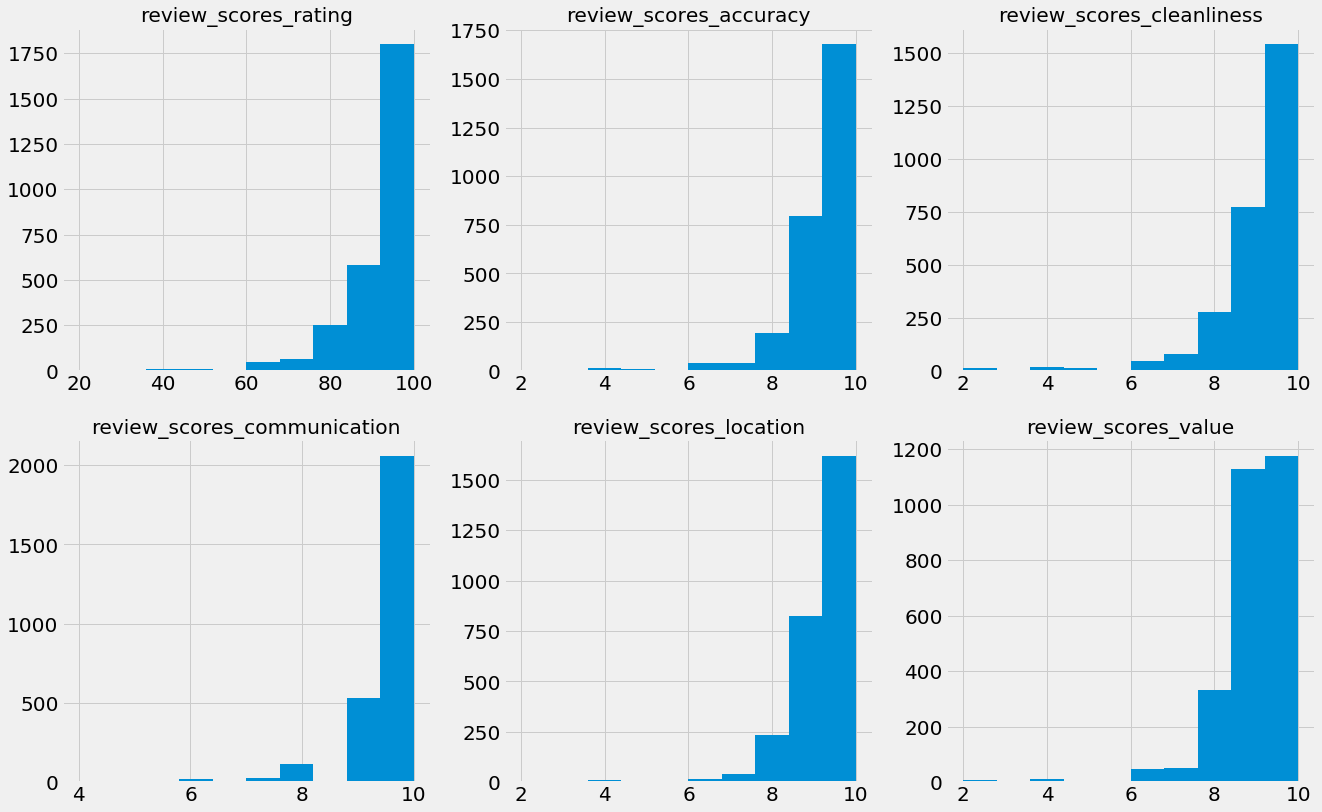

In [181]:
plt.rcParams['figure.figsize'] = (20,20)

plt.subplot(3,3,1)
plt.hist(listings['review_scores_rating'])
plt.title('review_scores_rating')

plt.subplot(3,3,2)
plt.hist(listings['review_scores_accuracy'])
plt.title('review_scores_accuracy')

plt.subplot(3,3,3)
plt.hist(listings['review_scores_cleanliness'])
plt.title('review_scores_cleanliness')

plt.subplot(3,3,4)
plt.hist(listings['review_scores_communication'])
plt.title('review_scores_communication')

plt.subplot(3,3,5)
plt.hist(listings['review_scores_location'])
plt.title('review_scores_location')

plt.subplot(3,3,6)
plt.hist(listings['review_scores_value'])
plt.title('review_scores_value')

## 2.2 Review data

We then take a look at the review data to understand what customers care about their stays. We use the tool `ReviewMiner` to run the analysis on a sample of the reviews data in 2016.

Data has in total 68275 rows and 6 features.
83.33% of the features don't have missing values


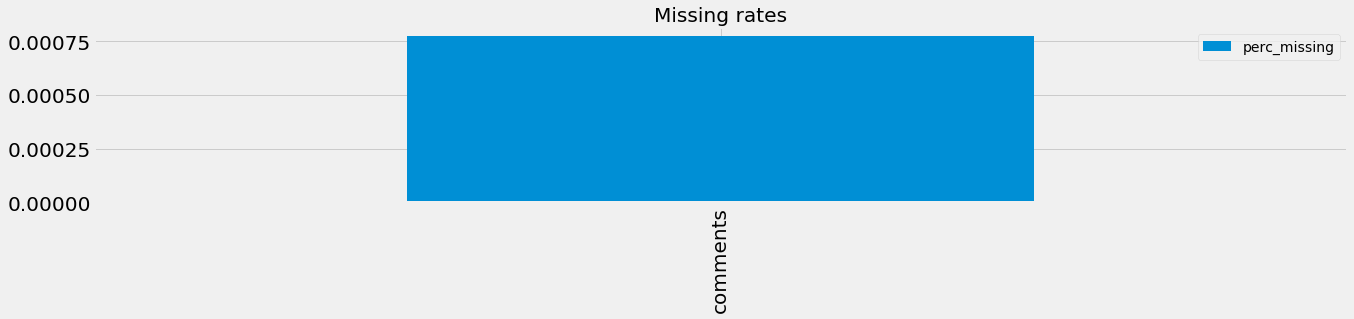

In [196]:
plt.rcParams['figure.figsize'] = (20,3)
data_first_look(reviews)

In [205]:
review2016 = reviews[reviews['date']>='2016-01-01']

In [209]:
pd.set_option('max_colwidth',200)
review2016.head()

listing_id        id        date  reviewer_id reviewer_name  \
171     1178162  58713980  2016-01-03      5967817         Peter   
172     1178162  59178493  2016-01-07     40707505       Shihkai   
173     1178162  59434723  2016-01-10     52937879         Chris   
174     1178162  60099509  2016-01-18     50576464          Jose   
175     1178162  60247907  2016-01-20     41413549        Shelby   

                                                                                                                                                                                                    comments  
171  Was able to score this place at the last minute. Very easy peasy to access to this place from Logan Airport. She left detailed instructions on how to find/access to this house.\r\n\r\nWhat's even ...  
172                                                                                                                                                                     Good house and clean room! Awesome\n  
173                                                                                  Great room, had all necessities that we needed. We didn't get to see Izzy, but was not a problem. Excellent experience.  
174                                                                                                                                                                                                Very good  
175  Our stay was great! We arrived much later than anticipated but the instructions for the self check in were easy to follow and we were fast asleep in no time at all. Great setup, everything is labe...

Aspect Opinion Extractor: 2019-08-04 15:35:58.015530
0.067 min later: finished 5.00%
0.15 min later: finished 10.00%
0.23 min later: finished 15.00%
0.32 min later: finished 20.00%
0.4 min later: finished 25.00%
0.48 min later: finished 30.00%
0.57 min later: finished 35.00%
0.65 min later: finished 40.00%
0.73 min later: finished 45.00%
0.83 min later: finished 50.00%
0.92 min later: finished 55.00%
1.0 min later: finished 60.00%
1.1 min later: finished 65.00%
1.1 min later: finished 70.00%
1.2 min later: finished 75.00%
1.3 min later: finished 80.00%
1.4 min later: finished 85.00%
1.5 min later: finished 90.00%
1.6 min later: finished 95.00%
Finished extracting the aspects. Original dataframe with the aspects and opinions in each comment: df_with_ao; The dataframe with all the aspects and relative opinions: aspects_opinions_df


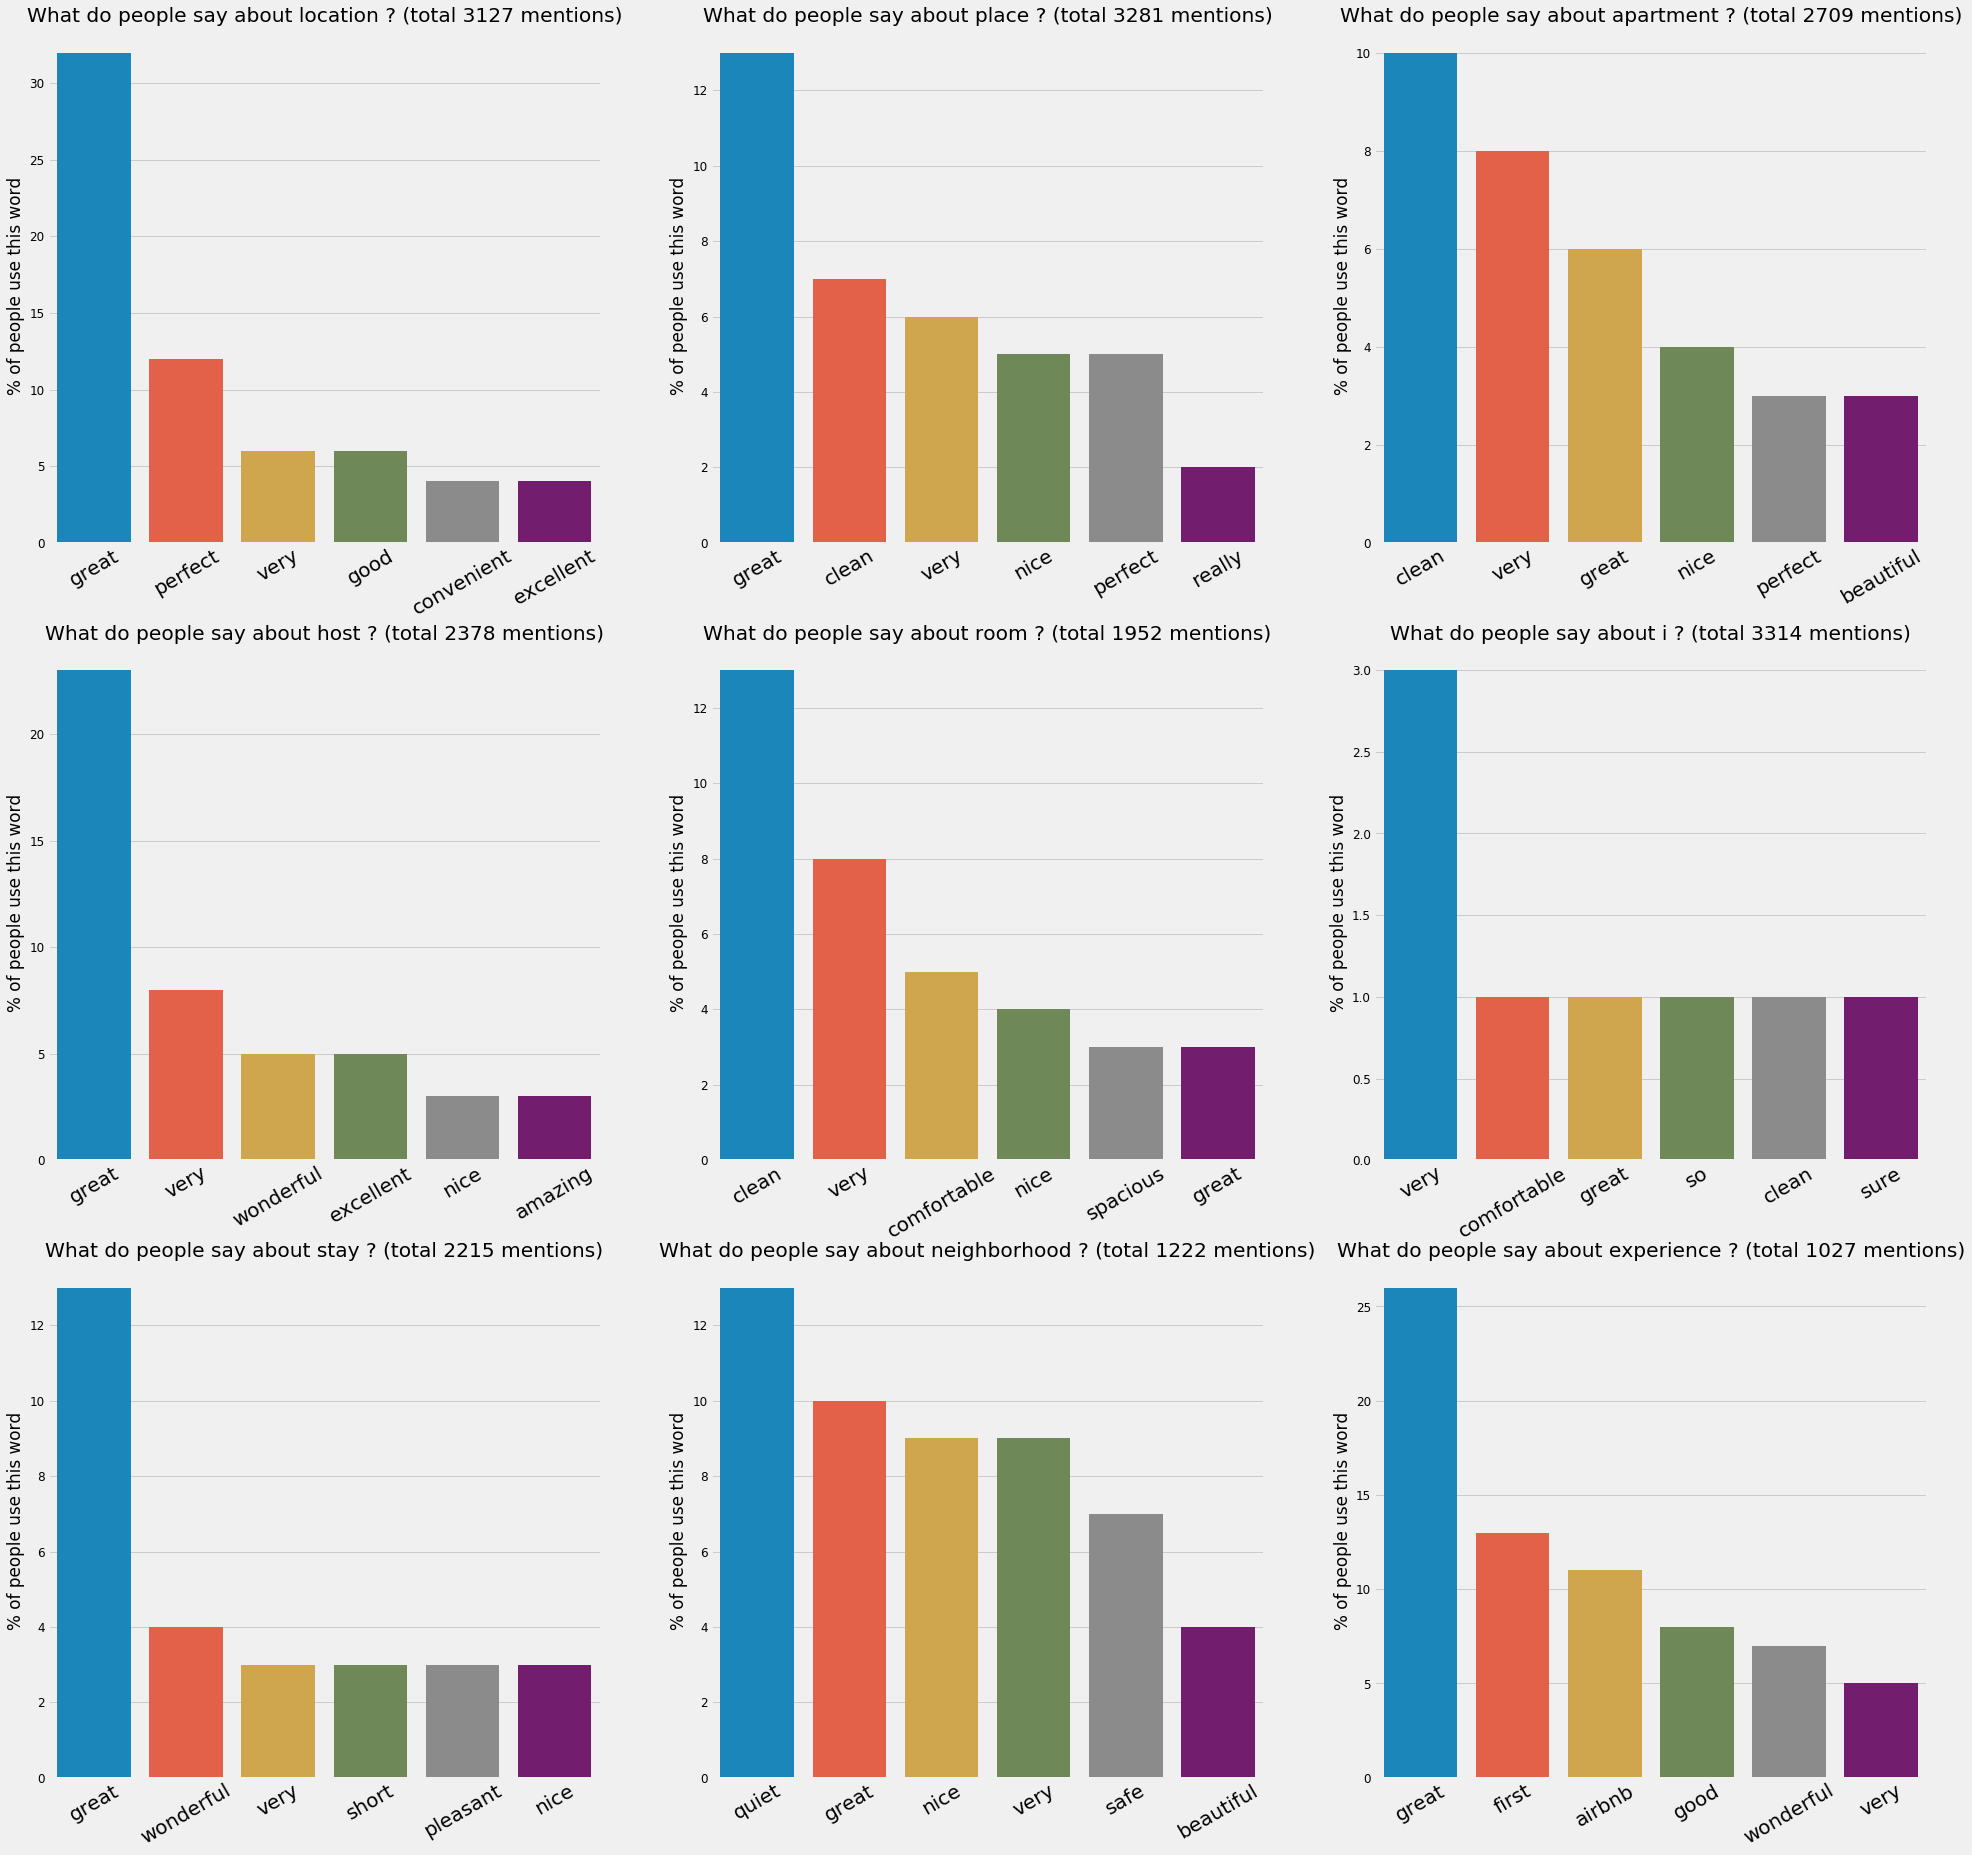


Sentiment Analysis: 2019-08-04 15:37:48.539143
Average sentiment score: 0.3060100397337567
98.49% of the comments are positive, 1.51% of the comments are negative

Negative Comments Explore: 2019-08-04 15:37:57.968715
all the negative comments are in all_negative_comments; negative comments by aspects are in negative_comments_by_aspects_dict


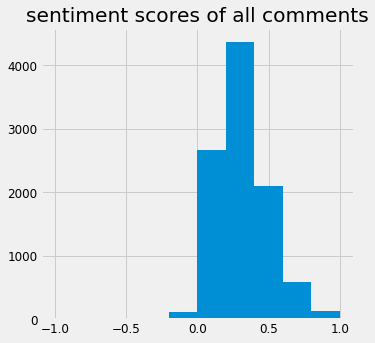

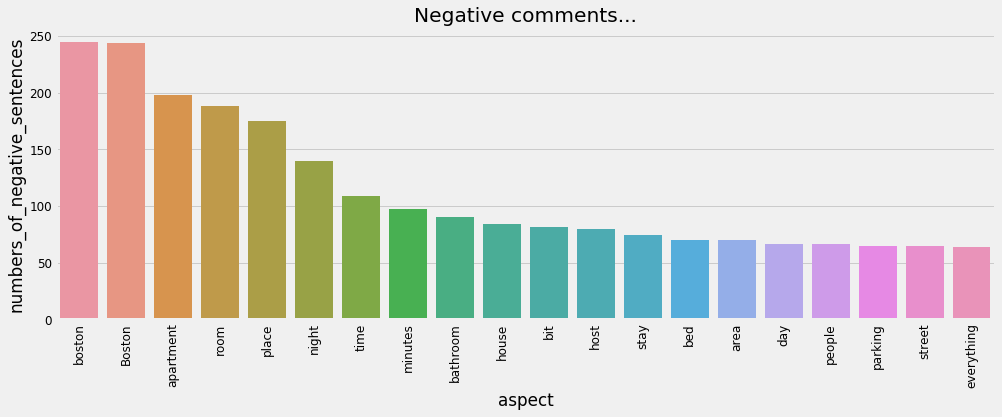


Time series: 2019-08-04 15:39:25.942997


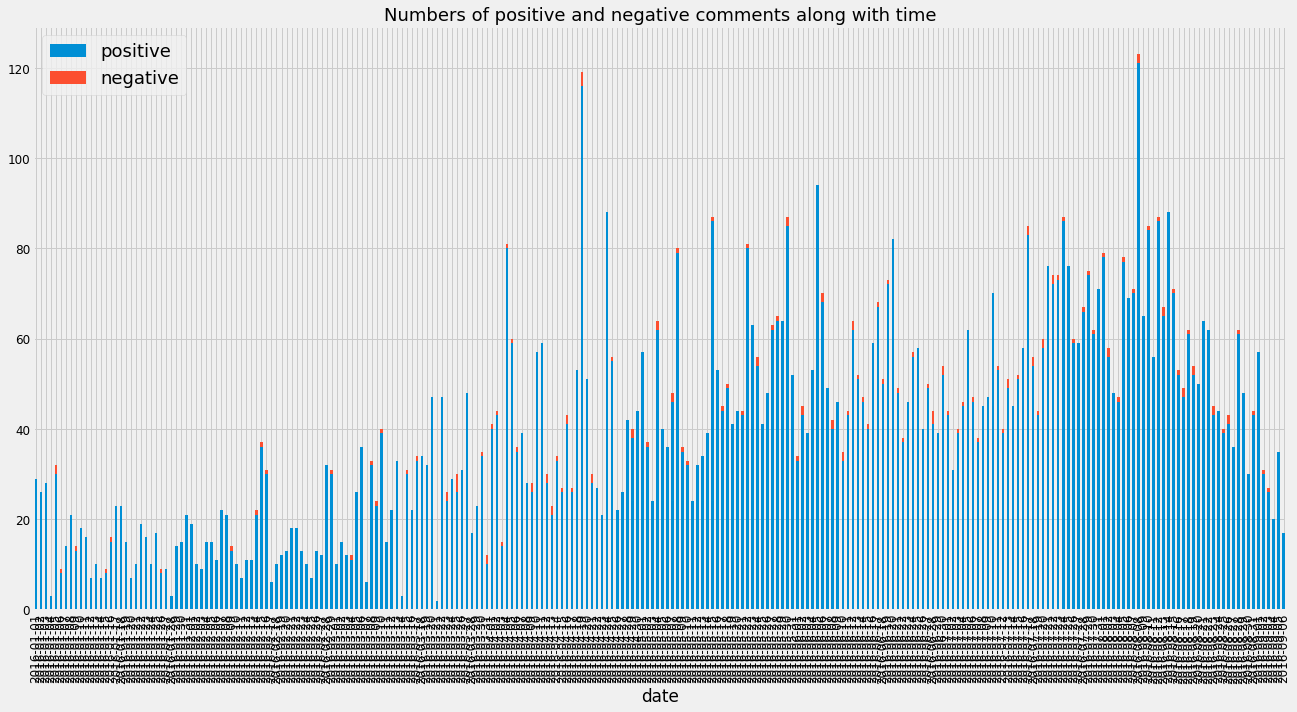

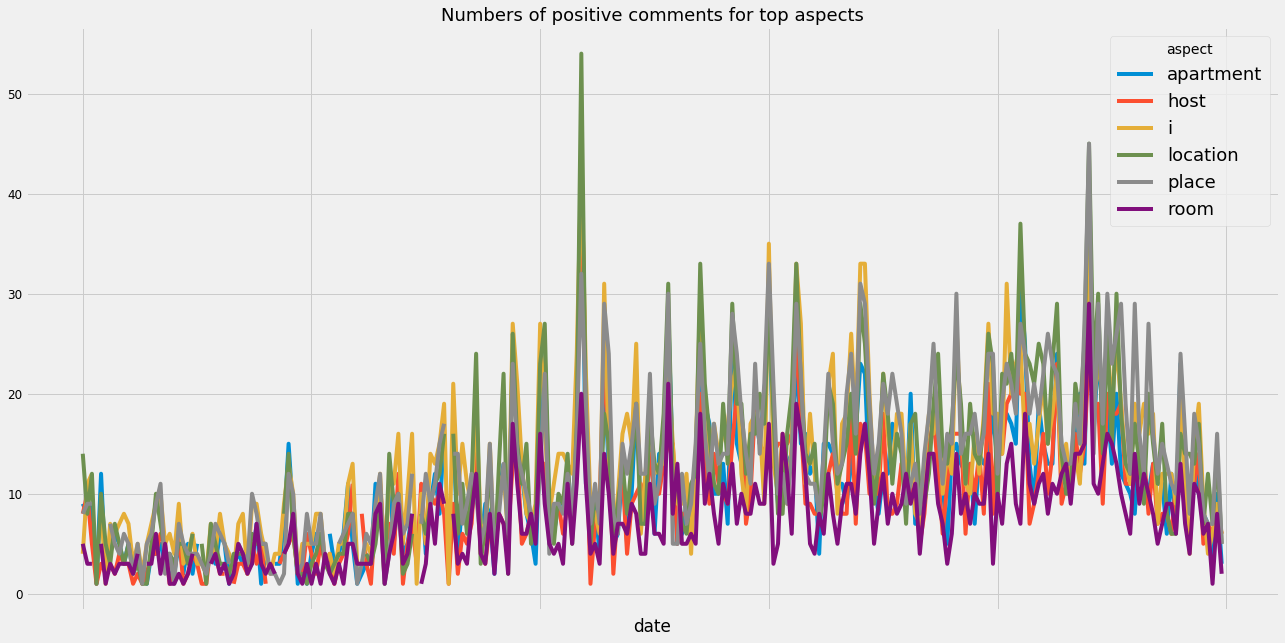

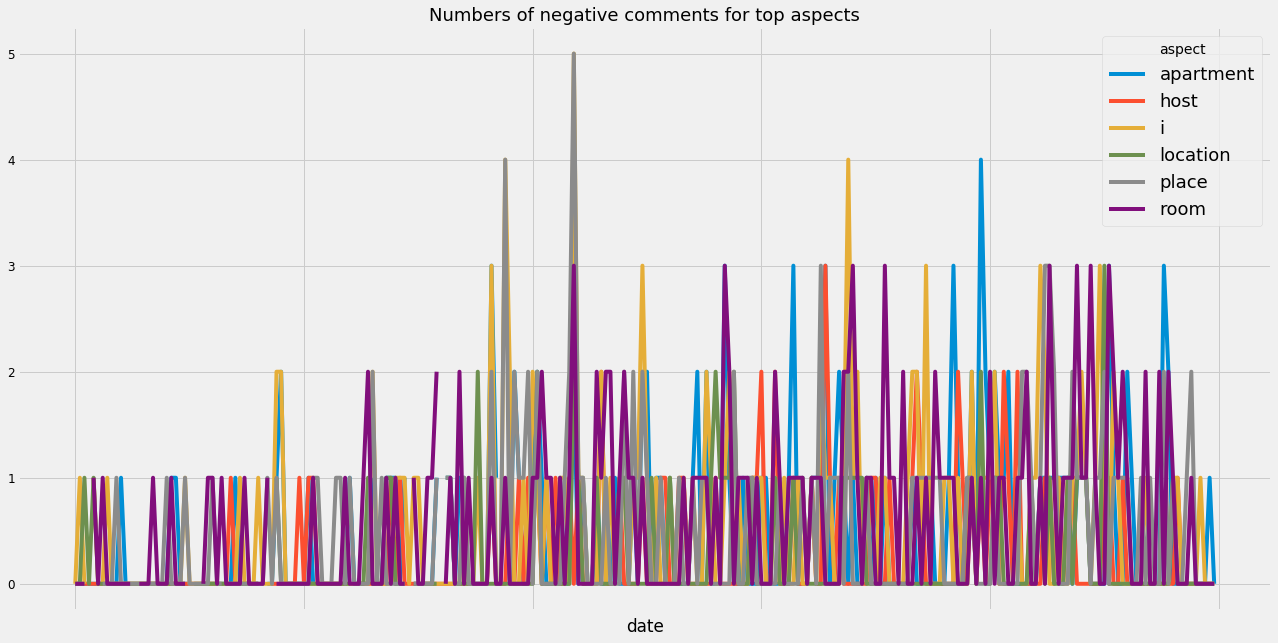

In [206]:
review_explore = ReviewMiner(review2016.sample(10000).reset_index(), 'id', 'comments', 'date')

It seems that most of comments are very positive comments. Out Aspect_Opinion Extractor only caught very general aspects. It's good to know that most of customers had great experience with their stay. However, we'd love to know what they were not satisfied with. To give an example, we did a deeper investigation on the aspect `bathroom`.

[(0, '0.047*"was" + 0.030*"bathroom" + 0.025*"very" + 0.018*"room" + 0.016*"not" + 0.010*"apartment" + 0.010*"dirty" + 0.009*"did" + 0.009*"kitchen" + 0.008*"had"'), (1, '0.038*"was" + 0.031*"bathroom" + 0.018*"is" + 0.014*"were" + 0.011*"people" + 0.010*"not" + 0.009*"felt" + 0.008*"apartment" + 0.008*"other" + 0.008*"be"'), (2, '0.060*"is" + 0.035*"bathroom" + 0.024*"other" + 0.021*"was" + 0.012*"little" + 0.012*"not" + 0.012*"bedroom" + 0.011*"floor" + 0.010*"small" + 0.008*"had"')]


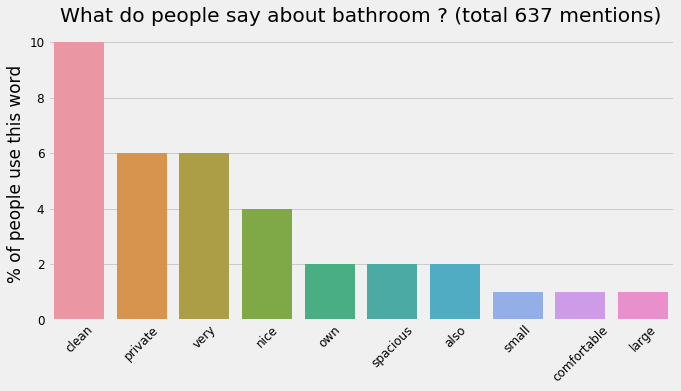

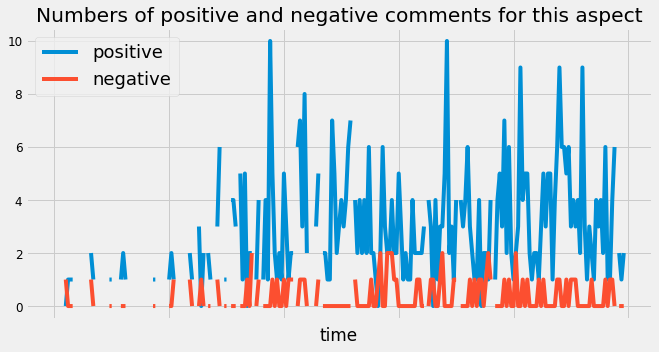

In [218]:
bathroom_reviews = review_explore.investigate("bathroom", topic_modeling=True)

Here are a few negative reviews of bathrooms! ⬇️

In [217]:
bathroom_reviews[:10]

["The kitchen and, especially, the bathroom, looked and felt very dirty. Personal products and medications left out or dumped on the floor, a soiled toilet, lots of dust on everything, and thus, not particularly inviting to use. I don't like having to leave a negative review.",
 'I also did not know the toilet hardly flushed.',
 "We arrived late on the day of check in and she still met us to give us a short introduction of her place. Only con was that there's only 1 toilet.",
 'Amazingly private room and toilet.',
 "I did have a few concerns. After a few minutes of standing on the porch, Cindy came out the door on her way out for the evening. She was very surprised and apologetic that I did not receive the instruction message she usually sends the day before. I'm really trying not to be too critical, but the room was a bit of a disappointment. I do not know what was wrong with the downstairs shower, but there was no setting cooler than scalding. Even with the dial turned all the way co